# INFO 2950 Final Project 

## __Fund Investment Decisions: Mutual Funds or Exchange Traded Funds?__

By Cameron Robinson (ctr48) , David Vilensky (dlv46) , Cassandra Kaufman (cpk57) , and Emily Sobel (es983)

## Introduction

A central pillar of the global economy is _investment_: the process of sacrificing present assets in order to get returns on those assets in the future. There are many different types of investments and investing can be dated all the way back to the 16th century. Hundreds of years later a strategy of investment emerged  in 18th century France: the idea of pooling assets together from various sources with the intent of collectively investing. 

These investment funds first emerged in the United States in the form of __Mutual Funds__, funds that are actively managed by a fund manager who uses the assets within the fund to generate returns for the fund shareholders. Because these funds need management in order to generate returns, there is a fee involved in joining them. The fund investment vehicle that later emerged to challenge Mutual Funds are __Exchange Traded Funds or ETFs__. In direct contrast with Mutual Funds, ETFs are passively managed -- they track a specific market index. With ETFs investors hope to capture the returns of the market on the whole, and not wasting the resources required to actively manage a fund.       

The question of wether the active management style of Mutual Funds can outperform the market and the passive investment style of ETFs has been debated by investors and the answer still remains unclear. In this project we hope to explore this question.

-----------------------------------------------------------------------------------------------
 

 __Research Question:__

What set of criteria is most important to the sucess of a mutual fund? What about amongst ETFs? Which type of fund is more successful overall can can the success of a fund be accurately predicted based on these observed criteria?

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Importing

In [1]:
# imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import re

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

## Data Overview



The file contains 24,821 Mutual Funds and 1,680 ETFs with general aspects (as Total Net Assets, management company and size), portfolio indicators (as cash, stocks, bonds, and sectors), returns (as yeartodate, 2020-11) and financial ratios (as price/earning, Treynor and Sharpe ratios, alpha, and beta). This data was scraped from Yahoo Finance by kaggle user Stefano Leone.

Link to dataset: https://www.kaggle.com/stefanoleone992/mutual-funds-and-etfs


## Data Description

The two datasets used were created to allow for multiple comparisons regarding portfolio decisions from investment managers in Mutual Funds and portfolio restrictions to the indexes in Exchnage traded funds. Each of the datasets are composed of publicly available information and were not funded by any companies or private organizations. The instances in each of the datasets are  funds with the respective fund type, either Exchange traded funds in the ETF.csv or Mutual funds in the Mutual Funds.csv. The columns in each of the datasets contain information on the respective fund's financial ratios, sector investments, risk ratios, and returns. The data in each of the datasets was collected over a time period between 2011 and 2020. The original datasets don't have any errors but they do contain null information in the form of empty columns that were dropped during our data cleaning. This preprocessing and all other preprocessing of the data found in the two datasets is extensively documented in our data cleaning section and we have made no additional modifications or alterations to the data. The creator of the datasets placed no copyrights or restrictions on their use and under its license of CC0: Public Domain, we have permission to access and use its both of the datsets content for our project. 
 

## Loading Data from CSV Files (see Cleaning Appendix for more details on how we manipulated and cleaned the original Kaggle DataSet)

In [2]:
df_mf=pd.read_csv('df_mf.csv')
df_etf=pd.read_csv('df_etf.csv')

df_mf2=pd.read_csv('preliminaryMF.csv')
df_etf2=pd.read_csv('preliminaryETF.csv')

df_mf3=pd.read_csv('preliminaryMF.csv')
df_etf3=pd.read_csv('preliminaryETF.csv')

df_mf_ratios=pd.read_csv('mf_ratios.csv')
df_etf_ratios=pd.read_csv('etf_ratios.csv')

df_mf_sector=pd.read_csv('mf_sectors.csv')
df_etf_sector=pd.read_csv('etf_sectors.csv')

df_mf_asset=pd.read_csv('mf_assets.csv')
df_etf_asset=pd.read_csv('etf_assets.csv')

df_mf_return_history=pd.read_csv('mf_returns.csv')
df_etf_return_history=pd.read_csv('etf_returns.csv')



In [3]:
df_mf3.fund_treynor_ratio_5years

0         2.77
1         5.38
2        13.48
3         5.05
4         2.73
         ...  
24816     1.62
24817    22.44
24818    22.21
24819    21.10
24820    21.34
Name: fund_treynor_ratio_5years, Length: 24821, dtype: float64

In [4]:
df_mf_asset.head()

,fund_symbol,asset_cash,asset_stocks,asset_bonds,asset_others,asset_preferred,asset_convertable,net_asset_value
0,AAAAX,1.88,63.87,15.31,18.95,0.00,0.00,6.979100e+08
1,AAADX,3.49,48.14,48.37,0.00,0.00,0.00,8.938000e+07
2,AAAGX,1.54,98.46,0.00,0.00,0.00,0.00,1.490000e+09
3,AAAIX,2.75,78.52,18.48,0.01,0.07,0.14,7.072500e+08
4,AAANX,1.54,98.45,0.00,0.01,0.00,0.00,4.955100e+08


In [5]:
df_mf_return_history.head()

,fund_symbol,fund_return_1month,fund_return_3months,fund_return_1year,fund_return_3years,fund_return_5years,fund_return_10years,fund_return_2019,fund_return_2018,fund_return_2017,...,fund_return_2012_q2,fund_return_2012_q1,fund_return_2011_q4,fund_return_2011_q3,fund_return_2011_q2,fund_return_2011_q1,fund_return_2010_q4,fund_return_2010_q3,fund_return_2010_q2,fund_return_2010_q1
0,AAAAX,-1.71,-1.02,-5.22,3.03,4.08,2.38,21.43,-5.37,14.67,...,-0.36,4.22,3.28,-8.39,-0.38,2.44,3.73,8.55,-2.53,2.23
1,AAADX,0.30,4.70,15.76,9.71,8.46,10.88,21.48,-5.53,17.05,...,-4.72,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAGX,-4.57,1.48,32.91,19.44,15.26,14.71,31.61,1.48,27.70,...,-5.23,16.35,9.91,-17.18,-0.95,3.93,11.38,10.39,-14.29,4.09
3,AAAIX,-1.32,1.22,8.36,6.79,8.19,8.66,24.67,-7.71,19.31,...,-3.20,11.44,8.40,-13.94,0.89,4.49,8.73,11.37,-8.13,3.92
4,AAANX,-2.43,0.56,1.73,3.04,5.73,NaN,20.60,-8.79,22.25,...,3.27,-2.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_mf_ratios.head()

,fund_symbol,fund_net_annual_expense_ratio,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,fund_sharpe_ratio_3years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,fund_treynor_ratio_3years,fund_treynor_ratio_5years,fund_treynor_ratio_10years
0,AAAAX,1.22,19.41,1.83,2.30,11.13,0.18,0.33,0.24,1.32,2.77,1.91
1,AAADX,1.43,21.21,3.60,3.26,15.29,0.93,0.74,0.89,6.82,5.38,7.10
2,AAAGX,1.12,38.70,11.46,5.31,26.26,0.92,0.88,0.93,16.87,13.48,13.03
3,AAAIX,0.63,21.81,2.45,1.44,11.45,0.41,0.61,0.73,3.70,5.05,5.87
4,AAANX,1.45,23.56,2.53,1.58,12.25,0.17,0.37,NaN,0.86,2.73,NaN


# Methods Used Section

Methods used for Data Cleaning

In [7]:
### Creates and returns a subset of df by keeping only the columns with 'keyword' in their column name. 
def cleanbykeyword(df,keyword):
    """
    Searches and creates a list of all of the column names in df that contain the keyword.
    Subsets the df according to this list, then creates a df_new dataframe with this 
    information and drops the corresponding columns from the original df.

    Arguments:
        df: Dataset pandas DataFrame.
        cols: List of columns to be included in calculations. 
        keyword: Word to be removed from column name in order to preserve clarity with labeling.
        
        
    Return: dataframe containing data matching keyword.
    """
    col_list=[ i for i in df.columns if (keyword in i)] 
    #print(col_list)
    df_new=df[col_list]
    df.drop(columns=col_list,axis=1,inplace=True) #removes duplicate data from df_mf masterframe
    df_new.insert(0,'fund_symbol',df.fund_symbol) #inserts the fund symbols as the 1st column of the new data set
    return (df_new)

Methods used for data exploration:

In [8]:
#creates two pie charts representing the relative distribution of funds in a certain category for both fund types
def comparison_pies(df1,df2,column,t1,t2):
    '''
    Creates two pie charts representing the relative distribution of funds in a certain category for both fund types
    
    Arguments:
        df: Pandas dataframe
        df2: Pandas dataframe
        column: column in df that is to be analyzed.
        t1:Title of pie chart 1 
        t2: Title of pie chart 2
        
    '''
    y=df1.groupby(column).fund_symbol.count()
    x=df2.groupby(column).fund_symbol.count()

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.pie(y,labels=y.index.to_numpy(),autopct='%.2f%%')
    ax2.pie(x,labels=x.index.to_numpy(),autopct='%.2f%%')
    
    ax1.set_title (t1)
    ax2.set_title(t2)
    plt.tight_layout()

In [9]:
#creates a pie chart representing the relative distribution of funds in a certain category 
def pie_chart(df,column):
    '''
    Creates a pie chart representing the relative distribution of funds in a certain category 
    
    Arguments:
        df: Pandas dataframe
        column: column in df that is to be analyzed.
    '''
    grouped=df.groupby(column).fund_symbol.count().to_frame()
    plt.pie(grouped.fund_symbol,labels=grouped.index,autopct='%.2f%%')
    plt.show()


In [10]:
#creates a pie chart representing the % composition of a certain range of values in a dataset.
def multiple_percent_comp_bar(df,df2,cols,cols2,keyword,t1,t2):
    """
    Creates two pie charts for two given DataFrame subsets. Each section in the pie chart
    represents a column mean within the dataframe, which corresponds to a % invested
    in a given category (sector/asset)
    
    Arguments:
        df: Dataset pandas DataFrame.
        df2: Dataset pandas DataFrame.
        cols: List (corresponding to df) of columns to be included in calculations. 
        cols2: Second List (corresponding to df2) of columns to be included in calculations. 
        keyword: Word to be removed from column name in order to preserve clarity with labeling.
        t1: Title of the first pie chart 
        t2: Title of the second pie chart
    """
    
    
    fig, (ax1, ax2) = plt.subplots(1,2)
        
        
    col_names=[]
    other=0
    col_sums=[]
    for column in cols:
        col_sum=df[column].mean()
        if(col_sum<1 or 'other' in column):
            other+=col_sum
        else:
            col_names.append(column.replace(keyword,''))
            col_sums.append(df[column].mean())
    if(other>0.1):
        col_names.append('other')
        col_sums.append(other)
    ax1.pie(col_sums,labels=col_names,autopct='%.2f%%') 
    ax1.set_title (t1)
   

    
    col_names2=[]
    other2=0
    col_sums2=[]
    for column in cols2:
        col_sum=df2[column].mean()
        if(col_sum<1 or 'other' in column):
            other+=col_sum
        else:
            col_names2.append(column.replace(keyword,''))
            col_sums2.append(df2[column].mean())
    if(other>0.1):
        col_names2.append('other')
        col_sums2.append(other)
    ax2.pie(col_sums2,labels=col_names2,autopct='%.2f%%') 
    ax2.set_title (t2)

    plt.tight_layout()
    plt.show()



In [11]:
#creats a pie chart representing the % composition of a certain range of values in a dataset.
def percent_comp_bar(df,cols,keyword):
    """
    Use:
    Creates a pie chart for a given DataFrame subset. Each section in the pie chart
    represents a column mean within the dataframe, which corresponds to a % invested
    in a given category (sector/asset)
    
    Arguments:
        df: Dataset pandas DataFrame.
        cols: List of columns to be included in calculations. 
        keyword: Word to be removed from column name in order to preserve clarity with labeling.
    """
    col_names=[]
    other=0
    col_sums=[]
    for column in cols:
        col_sum=df[column].mean()
        if(col_sum<1 or 'other' in column):
            other+=col_sum
        else:
            col_names.append(column.replace(keyword,''))
            col_sums.append(df[column].mean())
    if(other>0.1):
        col_names.append('other')
        col_sums.append(other)
    plt.pie(col_sums,labels=col_names,autopct='%.2f%%') 
    plt.show()


In [12]:
#Draws a boxplot representing the dependent column as a function of the independent column
def dep_by_indep_boxplot(df_joined,independent,dependent,fundtype,lowerRange,upperRange):
    '''
    Use:
    Creates a boxplot of dependent variable as a function of the idependent column.
    
    Arguments:
    df_joined: dataframe containing both the independent and dependent columns
    independent: column which serves as the independent variable
    dependent: column which serves as the dependent variable which is analyzed and plotted according to the dependent column.
    fundtype: Name of fund that is printed at the start of execution.
    lowerRange: parameter for the lower limit of Y-axis
    upperRange: parameter for the upper limit of Y-axis
    '''
    
    print('\n Distribution of {} according to {} in {}'.format(dependent,independent,fundtype)+':\n')

    colors=['blue','grey','magenta','yellow','cyan','orange']    
    criteria=[i for i in df_joined[independent].sort_values(ascending=True).dropna().unique()]
    col_count=len(criteria)
    table=df_joined.melt(id_vars=[independent],value_vars=[dependent]).dropna()
    
    fig,ax=plt.subplots(nrows=1,ncols=col_count,figsize=(15,9))
    for i in range(0,col_count):
        sns.boxplot(data=table.where(table[independent]==criteria[i]).value,ax=ax[i],color=colors[i])
        ax[i].set_title(independent + ' = ' + str(criteria[i]))
        ax[i].set_ylim([lowerRange,upperRange])
        plt.tight_layout()
    plt.show()
  
    

In [13]:
#Creates a bar plot of the 20 most common values in the given column
def distribution_by_category(df):
    '''
    Use:
    Creates a barplot of percentage invested in each category
    
    Arguments
    df: dataframe of funds containing category type.
    
    '''
    cat_count=df['category'].value_counts()[:20]
    sns.barplot(x=cat_count.values,y=cat_count.index)
    plt.title('Distribution by Category')
    plt.tight_layout
    plt.show()

Methods used for analysis: 

In [14]:
## returns a data frame of the correlations of the variables in the 'predictors' array with the 'independentVariable' in the data frame 'df'
def get_correlations(df,predictors,independentVariable):
    '''
    Use:
    Performs a linear regression by fitting the predictors to the independent variable.
    
    Arguments:
    df: Dataframe containing the variables
    predictors: predictor variables in the lin reg model
    independentVariable: independtVariable in the lin reg model
    '''
    
    #Scaling columns with discrete variables
    scaled = StandardScaler().fit_transform(df[predictors])
    df[predictors]=scaled
    
    df_corr=pd.DataFrame(index=['correlation'],columns=predictors)
    for predictor in predictors:
        model=LinearRegression().fit(df[[predictor]],df[independentVariable])
        correlation=model.score(df[[predictor]],df[independentVariable])
        df_corr[predictor]=round(correlation,4)
        
    return df_corr.T

In [15]:
def bootstrap_correlations(df,predictors,independentVariable,num_trials,sample_size):
    '''
    Utilizes bootstrap samping to minimize the effect of outliers in our get_correlations() method. 
    Bootstrap_Correlations resamples the dataframe several times and returns the average correlation of all get_correlations() trials.
    
    
    Arguments:
    df: Dataframe containing the variables
    predictors: predictor variables in the lin reg model
    independentVariable: independtVariable in the lin reg model
    num_trials: Number of samples & trials (number of times get_correlations() is called)
    sample_size: Sample size of each bootstrap resampling
    
    ''' 
    df.dropna(subset=predictors,inplace=True)
    df.dropna(subset=[independentVariable],inplace=True)
    
    #creates new dataframe to store correlation data for each trial
    df_corr_trials=pd.DataFrame(index=np.arange(num_trials),columns=predictors)
    
    for i in range(num_trials):
        sample=df.sample(n=sample_size, replace=True)
        df_corr=get_correlations(sample,predictors,independentVariable)
        corr_col=df_corr.correlation
        for w in range(len(corr_col)):
            df_corr_trials.iloc[i,w]=corr_col[w]
    
    df_average_corrs=pd.DataFrame(index=['correlation'],columns=predictors)
    for col in df_corr_trials.columns:
        mean=df_corr_trials[col].mean()
        df_average_corrs.loc['correlation',col]=mean
    return df_average_corrs.T


In [16]:
## filters the correlations in the data frame 'df_corrs' and adds the correlations greater than .10
## pass in 'df_mf_highest_corrs' or 'df_etf_highest_corrs' in the variable 'df_high_corrs' for respective fund types
def filter_correlations(df_corrs,df_high_corrs):
    '''
    Use:
    Filters df_corrs and adds the correlations with an absolute value >.10 to df_high_corrs
    
    Argumemts:
    df_corrs: DataFrame containing correlations that needs to be filtered
    df_high_corrs: DataFrame where filtered correlations are added
    '''
    for i in df_corrs.index:
        corr=df_corrs.loc[i,'correlation']
        if (corr>.10 or corr <-.10):
                df_high_corrs[i]=corr

In [17]:
## Generates a bar plot of the correlations in the data frame 'df_corr' that have correlations greater than the value 'cutoff' 
## the plot is titled 'title' and has index labels of font size 'labelsize'
def corr_visualize(df_corr,cutoff,title,labelsize):
    '''
    Use:
    Creates a barplot of all the variables with a correlation above the cutoff.
    
    Arguments:
    df_corr: DataFrame containing correlation coefficients
    cutoff: Smallest correlation value that will be included in the graph
    title: Title of the graphh
    labelsize: labelsize of the X-ticks
    '''
    df_cutoffs=df_corr[df_corr['correlation']>cutoff]
    sns.barplot(x=df_cutoffs.index,y=df_cutoffs['correlation'],palette='rocket')
    plt.title(title)
    plt.tick_params(labelsize=labelsize)
    plt.tight_layout()


In [18]:
def greater_than(df,parameter):
    '''
    Use:
    Determines whether the return in a certain time frame is above thhe category average
    
    Arguments:
    df: DataFrame containing both fund and categorical return data
    parameter: Timeframe to compare return data in
    '''
    cat="category_return_"+ parameter
    fund="fund_return_" + parameter
    newcol=">average_" +parameter
    
    cat_idx= df.columns.get_loc(cat)
    fund_idx= df.columns.get_loc(fund)
    
    greater_list = []
    for i in range(df.shape[0]):
        if(df.iloc[i,fund_idx]>df.iloc[i,cat_idx] ):
            greater_list.append(1)
        else:
            greater_list.append(0)
    df[newcol]=greater_list

In [19]:
def log_prob(df,df2,predictor,greater_col):
    '''
    Use: 
    Utilizes the predictor variable in both DataFrames to fit a test_train_split model to predict whether fund return is above average by assigning 0 or 1.
    Then, calculates the accuracy and R-squared for each model, and plots the predictor variable's predictive accuracy as a probability out of 1.
    
    The log_prob function does this twice, once for df and once for df2. The convention we stuck with in our project was to have ETF as df and MF as df2. Switching the order 
    will not affect the function performance, but the graphs will be titled wrong. This can easily be adjusted with the inclusion of  title1,title2 as parameters.
    
    Arguments:
    df: first dataframe used in calculations
    df2: second dataframe used in calculations
    predictos: predictor variable used in calculations
    greater_col: name of the binary column in each DataFrame that corresponds to above-average (or below-average) return.
    '''
    df[predictor]=StandardScaler().fit_transform(df[[predictor]])
    df=df[df[predictor]<4.5]

    #df=df.loc[df['category']=='World Allocation']
    #df=df.groupby('category')
    X_train, X_test, y_train, y_test = train_test_split(df[[predictor]], df[greater_col], test_size=0.4)
    logit=LogisticRegression().fit(X_train,y_train)
    

    #Calculate expected probability of above average return and save as y_pred variable
    y_prob=logit.predict_proba(X_test)[:,1]
    
    #Predict 0,1 for train data and save to variable
    y_pred=logit.predict(X_test)

    
    #Calculates % Accuracy
    num_correct=0
    length=len(y_pred)
    for i in range(length):
        if y_pred[i]==y_test.iloc[i]:
            num_correct=num_correct+1
    df_accuracy=num_correct/length
    df_r2=logit.score(X_train,y_train)

    
    fig, (ax1,ax2) = plt.subplots(1,2)
    #Draws scatterplots of predicted probability and actual 0,1 values
    ax1.scatter(x=X_test[predictor],y=y_prob,alpha=0.5,c='orange')
    ax1.scatter(x=X_test[predictor],y=y_test,alpha=0.3)
    ax1.set_title ('ETF ({:.2f}% accuracy, {:.2f} R^2)'.format(df_accuracy*100,df_r2))
    
    plt.tight_layout()
    
    '''
    Same process but for df2
    '''
    
    df2[predictor]=StandardScaler().fit_transform(df2[[predictor]])
    df2=df2[df2[predictor]<4.5]
    X_train, X_test, y_train, y_test = train_test_split(df2[[predictor]], df2[greater_col], test_size=0.4)
    logit=LogisticRegression().fit(X_train,y_train)
    

    #Calculate expected probability of above average return and save as y_pred variable
    y_prob=logit.predict_proba(X_test)[:,1]
    
    #Predict 0,1 for train data and save to variable
    y_pred=logit.predict(X_test)

    
    #Calculates % Accuracy
    num_correct=0
    length=len(y_pred)
    for i in range(length):
        if y_pred[i]==y_test.iloc[i]:
            num_correct=num_correct+1
    df2_accuracy=num_correct/length
    df2_score=logit.score(X_train,y_train)
    #Print summary statistics
    print('Predictors: {}'.format(predictor))
    
    #Draws scatterplots of predicted probability and actual 0,1 values
    ax2.scatter(x=X_test[predictor],y=y_prob,alpha=0.5,c='orange')
    ax2.scatter(x=X_test[predictor],y=y_test,alpha=0.3)
    ax2.set_title ('MF ({:.2f}% accuracy, {:.2f} R^2)'.format(df2_accuracy*100,df2_score))
    plt.tight_layout()

Methods used for hypothesis testing 

In [20]:
def contingency(data1,data2):
    '''
    This is a helper function for the chi_test function. 
    This function makes a contingency table of two different lists of data and 
    does a chi squared test for association on the data 
    '''
    
    contingency = np.zeros((4,4))
    
    if len(data1) < len(data2):
        num = len(data1)
    else:
        num = len(data2)

    for x in range(num):
        if data1[x] != 5 and data2[x] != 5:
            a = data1[x]
            b = data2[x]
            contingency[a-1,b-1] = contingency[a-1,b-1] + 1

    cont = pd.DataFrame(contingency)
    print(cont)
    print("This table shows us how many of each values are in each section of the overall ranges")
    print('\n')
    
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(contingency)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Because the p-value is less than the alpha value, we reject the null hypothesis.')
        print('We conclude that the alternate hypothesis is true and the two groups are dependent on one another')
    else:
        print('Because the p-value is greater than the alpha value, we cannot reject the null hypothesis.')
        print('We conclude that the null hypothesis is true and the two groups are independent of one another')

In [21]:
def chi_test(df1,df2,col1,col2):
    '''
    This function is used to do a chi squared test test for independence on two columns in two given dataframes.
    This function primarily recodes two numeric columns in a dataframe to categorical values.
    '''
    
    r = df1[col1]
    array1_nan = np.array(r)

    array1 = []
    for x in array1_nan:
        if 0/x == 0:
            array1.append(x)

    min1  = np.quantile(array1,.0)
    q1_1 = np.quantile(array1,.25)
    median1 = np.quantile(array1,.5)
    q3_1 = np.quantile(array1,.75)
    max1 = np.quantile(array1,1)

    recoded_col1 = []
    for x in range(len(array1_nan)): 
        if min1<= array1_nan[x] < q1_1 :
            recoded_col1.append(1)
        elif q1_1<= array1_nan[x] < median1:
            recoded_col1.append(2)
        elif median1<= array1_nan[x] < q3_1:
            recoded_col1.append(3)
        elif q3_1<= array1_nan[x] <= max1:
            recoded_col1.append(4)
        else:
            recoded_col1.append(5)


    z = df2[col2]
    array2_nan = np.array(z)
    
    array2 = []
    for x in array2_nan:
        if 0/x == 0:
            array2.append(x)

    min2  = np.quantile(array2,.0)
    q1_2 = np.quantile(array2,.25)
    median2 = np.quantile(array2,.5)
    q3_2 = np.quantile(array2,.75)
    max2 = np.quantile(array2,1)

    recoded_col2 = []
    for x in range(len(array2_nan)): 
        if min2<= array2_nan[x] < q1_2 :
            recoded_col2.append(1)
        elif q1_2<= array2_nan[x] < median2:
            recoded_col2.append(2)
        elif median2<= array2_nan[x] < q3_2:
            recoded_col2.append(3)
        elif q3_2<= array2_nan[x] <= max2:
            recoded_col2.append(4)
        else:
            recoded_col2.append(5)
    contingency(recoded_col1, recoded_col2)

In [22]:
def two_samp_t(df1,df2,col1,col2):
    '''
    This method performs a two sample t-test for two given columns in the given dataframes
    '''
    x = df1[col1]
    y = df2[col2]
    from scipy.stats import ttest_ind

    stat, pval = ttest_ind(x,y,nan_policy='omit')
    #less if h1/x<h2/y
    #more if h1>h2
    print('The test statistic for this two sample t-test is: '+str(stat))
    print('The p-value of this two sample t-test is: '+str(pval))
    print('\n')
    
    alpha = 0.05
    if pval <= alpha:
        print('Because the p-value is less than the alpha value, we reject the null hypothesis.')
        print('We conclude that the alternate hypothesis is true and there is a difference in the means of each of the groups')
    else:
        print('Because the p-value is greater than the alpha value, we cannot reject the null hypothesis.')
        print('We conclude that the null hypothesis is true and there is not a difference in the means of each group')

# __Exploring Our Dataset__

### __Fund Size__

The size type of the fund tells us how much overall value of the capital held by the fund in the current market. Large size means having more value, and small size means less value in the market.

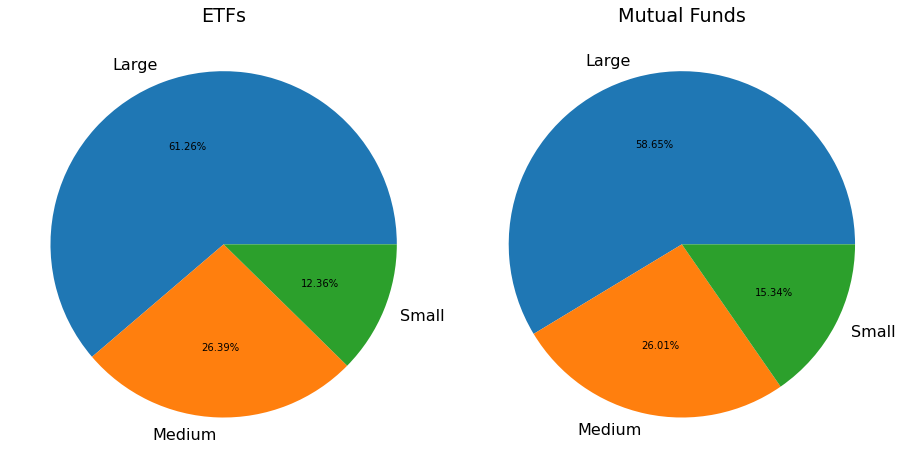

In [23]:
comparison_pies(df_etf,df_mf,'size_type','ETFs','Mutual Funds')

From the pie charts we can see the size of funds is pretty similar across Mutual Funds and ETFs. There are a slightly higher proportion of large Mutual Funds than large ETFs and there are slightly more medium sized ETFs than medium sized Mutual Funds. 

### __Investment Type__

There are three main investment types of for a fund: Growth, Value and Blend. The growth type is a fund that invests primarily in stocks that are expected to increase in capital value rather than yield high income. Value funds follow a policy that focuses on investing in stocks based on fundamental characteristics that are undervalued in quality. Blend funds hold a mix of both growth stock and value stock and contain only stocks and no fixed-income securities.

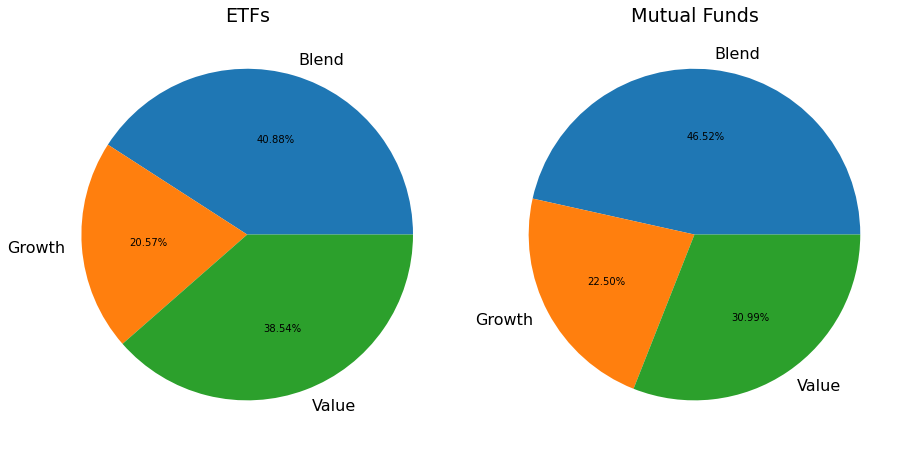

In [24]:
comparison_pies(df_etf,df_mf,'investment_type','ETFs','Mutual Funds')

The proportion of growth funds is very similar across Mutual Funds and ETFs, while the other two proportions are slightly different. The proportion of blend funds in Mutual Funds is greater than that of ETFs, while the proportion of growth funds in Mutual Funds is less than that of ETFs. Overall, investment types are relatively the same across Mutual Funds and ETFs.

### __Asset Distributions__

These graphs shows us the percentages of each type of asset that make up the fund. A distribution is a payment of interest, principal, or dividend by the issuer of the security to investors, and in these graphs, the different distributions are stocks, bonds, cash, and other. 

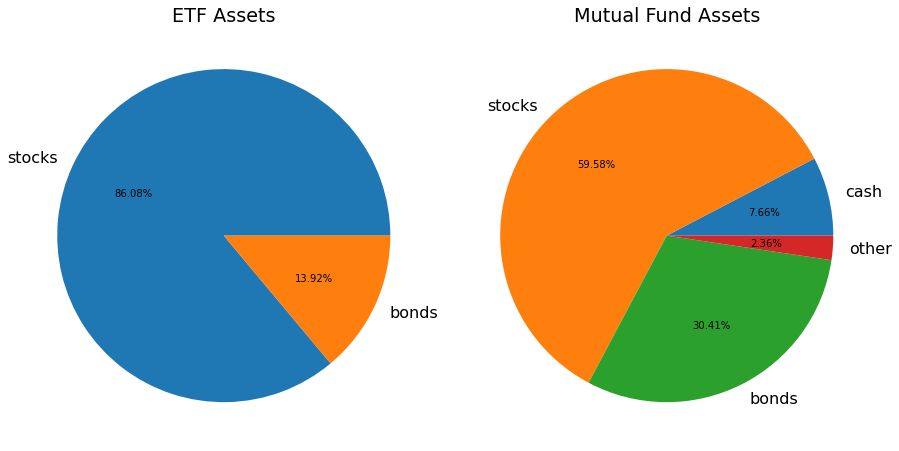

In [25]:
cols=[i for i in df_etf_asset.columns[1:3]]
cols2=[i for i in df_mf_asset.columns[1:7]]

multiple_percent_comp_bar(df_etf_asset,df_mf_asset,cols,cols2,'asset_','ETF Assets',"Mutual Fund Assets")

The asset distributions between Mutual Funds and ETFs appear to be very different. In the case of ETFs, their only two assets are stocks and bonds , while Mutual Funds have stocks, bonds, cash, and a miscellaneous section. ETF's have almost all of their assets in stocks and a very small amount in bonds. Mutual funds have about half their assets in stocks and about a third in bonds, then they have the remaining tenth in cash and miscellaneous. This is a huge difference and one of the most notable differences between the fund types.

### __Sector Distributions__

These graphs shows us the distribution of which sector the funds are investing in. The different sectors in the graph tell us which industry the assets are being invested in.

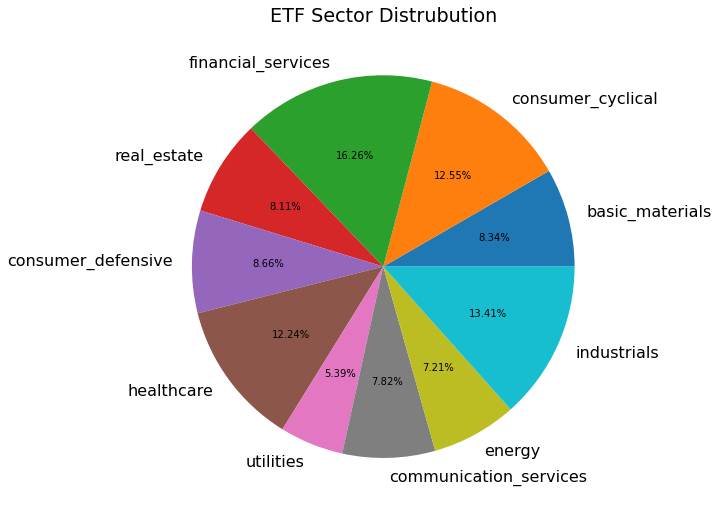

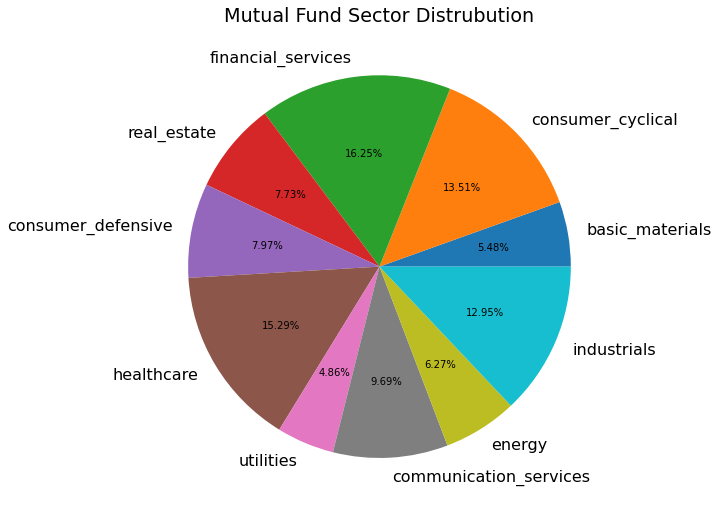

In [26]:
cols=[i for i in df_mf_sector.columns[1:11]]
plt.title('ETF Sector Distrubution')
percent_comp_bar(df_etf_sector,cols,'sector_')
plt.title('Mutual Fund Sector Distrubution')
percent_comp_bar(df_mf_sector,cols,'sector_')

These two sector graphs are very similar between ETFs and Mutual Funds. Each sector has a very similar percentage, varying from around a 1% difference between Mutual Funds and ETFs. The sector with the largest difference is the basic materials sector, still with a minimal difference of approximately 3%. The majority for both graphs is financial services, and the minority for both graphs is utilities. 

### __Risk Ratings__

A metric unique to Mutual Funds is risk rating, which gives a score 1-5 on how risky the fund is.

 Let's look at the proportion of funds with each risk rating in the Mutual Fund dataset: 

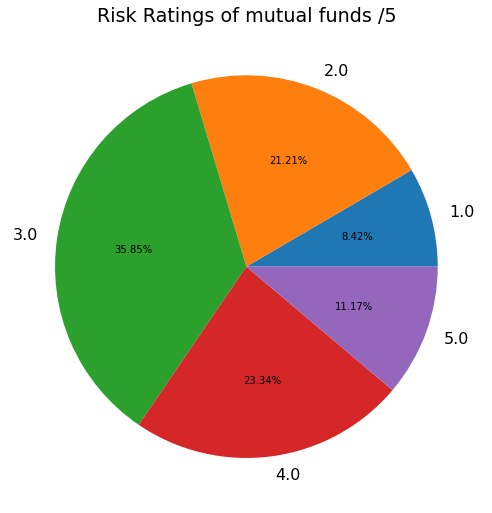

In [27]:
plt.title('Risk Ratings of mutual funds /5')
pie_chart(df_mf,'risk_rating')

Both the safest and riskiest kinds of funds are the most rare and the most common risk rating is a 3.0. Fund ratings with moderate risk or moderate safety are the second most common types.

In investing it is assumed the greater risk you inherit with an investment the more lucrative the returns on the investment. Since it is more likely you will lose money on this investment, you need an additional reward to compensate for the increased risk. Lets use a box and whisker plot to see the distribution of 3 years fund return and see if more of the risky funds lose money on investments than safer funds:

In [28]:
df_mf_return_history.head()

,fund_symbol,fund_return_1month,fund_return_3months,fund_return_1year,fund_return_3years,fund_return_5years,fund_return_10years,fund_return_2019,fund_return_2018,fund_return_2017,...,fund_return_2012_q2,fund_return_2012_q1,fund_return_2011_q4,fund_return_2011_q3,fund_return_2011_q2,fund_return_2011_q1,fund_return_2010_q4,fund_return_2010_q3,fund_return_2010_q2,fund_return_2010_q1
0,AAAAX,-1.71,-1.02,-5.22,3.03,4.08,2.38,21.43,-5.37,14.67,...,-0.36,4.22,3.28,-8.39,-0.38,2.44,3.73,8.55,-2.53,2.23
1,AAADX,0.30,4.70,15.76,9.71,8.46,10.88,21.48,-5.53,17.05,...,-4.72,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAGX,-4.57,1.48,32.91,19.44,15.26,14.71,31.61,1.48,27.70,...,-5.23,16.35,9.91,-17.18,-0.95,3.93,11.38,10.39,-14.29,4.09
3,AAAIX,-1.32,1.22,8.36,6.79,8.19,8.66,24.67,-7.71,19.31,...,-3.20,11.44,8.40,-13.94,0.89,4.49,8.73,11.37,-8.13,3.92
4,AAANX,-2.43,0.56,1.73,3.04,5.73,NaN,20.60,-8.79,22.25,...,3.27,-2.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Distribution of fund_return_3years according to risk_rating in Mutual Funds:



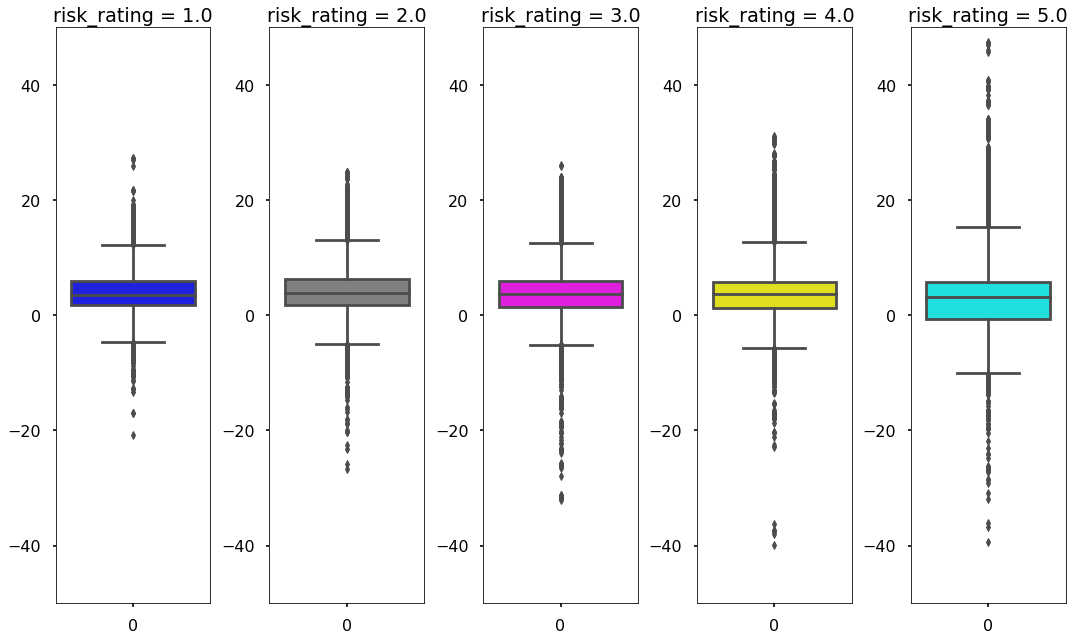

In [29]:
#Price earnings ratio vs. risk rating for Mutual Funds
joined=pd.merge(df_mf,df_mf_return_history)
dep_by_indep_boxplot(joined,'risk_rating','fund_return_3years','Mutual Funds',-50,50)

In [30]:
joined.head()

,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_strategy,investment_type,...,fund_return_2012_q2,fund_return_2012_q1,fund_return_2011_q4,fund_return_2011_q3,fund_return_2011_q2,fund_return_2011_q1,fund_return_2010_q4,fund_return_2010_q3,fund_return_2010_q2,fund_return_2010_q1
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,2007-07-29,World Allocation,3.0,3.0,3.0,The investment seeks total return in excess of...,Blend,...,-0.36,4.22,3.28,-8.39,-0.38,2.44,3.73,8.55,-2.53,2.23
1,AAADX,Aberdeen Income Builder Fund Class A,Aberdeen,2011-12-29,Allocation - 50% to 70% Equity,4.0,5.0,5.0,The investment seeks income; long-term growth ...,Blend,...,-4.72,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Thrivent Funds,1999-10-28,Large Growth,3.0,3.0,4.0,The investment seeks long-term capital appreci...,Growth,...,-5.23,16.35,9.91,-17.18,-0.95,3.93,11.38,10.39,-14.29,4.09
3,AAAIX,American Century Strategic Allocation: Aggress...,American Century Investments,2000-07-31,Allocation - 70% to 85% Equity,4.0,4.0,3.0,The investment seeks the highest level of tota...,Blend,...,-3.20,11.44,8.40,-13.94,0.89,4.49,8.73,11.37,-8.13,3.92
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Horizon Investments,2012-01-30,Tactical Allocation,3.0,4.0,5.0,The investment seeks capital appreciation. The...,Blend,...,3.27,-2.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_mf_return_history.head()

,fund_symbol,fund_return_1month,fund_return_3months,fund_return_1year,fund_return_3years,fund_return_5years,fund_return_10years,fund_return_2019,fund_return_2018,fund_return_2017,...,fund_return_2012_q2,fund_return_2012_q1,fund_return_2011_q4,fund_return_2011_q3,fund_return_2011_q2,fund_return_2011_q1,fund_return_2010_q4,fund_return_2010_q3,fund_return_2010_q2,fund_return_2010_q1
0,AAAAX,-1.71,-1.02,-5.22,3.03,4.08,2.38,21.43,-5.37,14.67,...,-0.36,4.22,3.28,-8.39,-0.38,2.44,3.73,8.55,-2.53,2.23
1,AAADX,0.30,4.70,15.76,9.71,8.46,10.88,21.48,-5.53,17.05,...,-4.72,10.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAGX,-4.57,1.48,32.91,19.44,15.26,14.71,31.61,1.48,27.70,...,-5.23,16.35,9.91,-17.18,-0.95,3.93,11.38,10.39,-14.29,4.09
3,AAAIX,-1.32,1.22,8.36,6.79,8.19,8.66,24.67,-7.71,19.31,...,-3.20,11.44,8.40,-13.94,0.89,4.49,8.73,11.37,-8.13,3.92
4,AAANX,-2.43,0.56,1.73,3.04,5.73,NaN,20.60,-8.79,22.25,...,3.27,-2.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As can be seen from the visual above, the whiskers get longer as the fund riskyness increases. This is because these riskier funds are more likley to lose lots of money and more likely to gain lots of money if they are profitable. The riskier funds should exhibit more extreme behavior than safer funds,and this can clearly be seen above.

 ### __Distribution By Category__

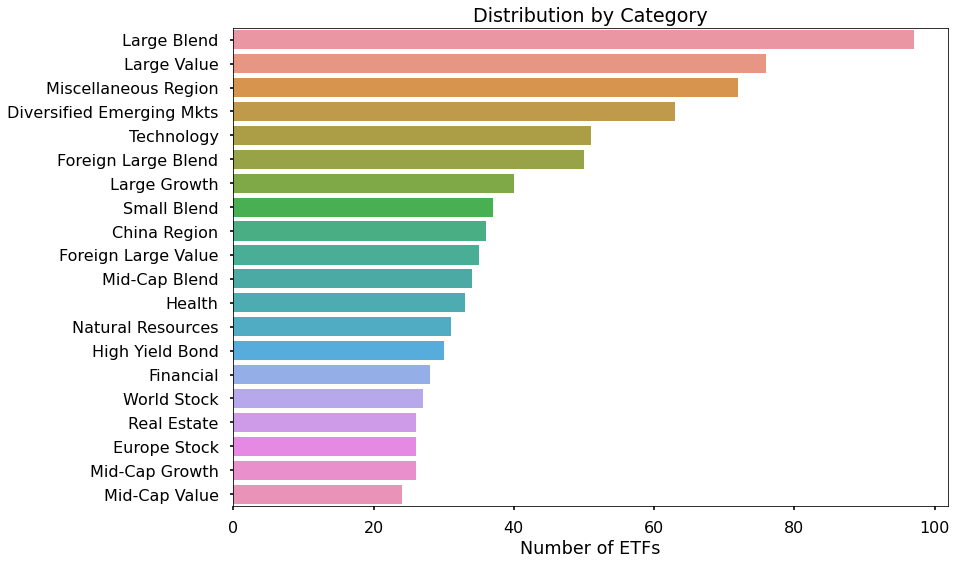

In [32]:
#ETF distribution by category 
plt.xlabel('Number of ETFs')
distribution_by_category(df_etf)

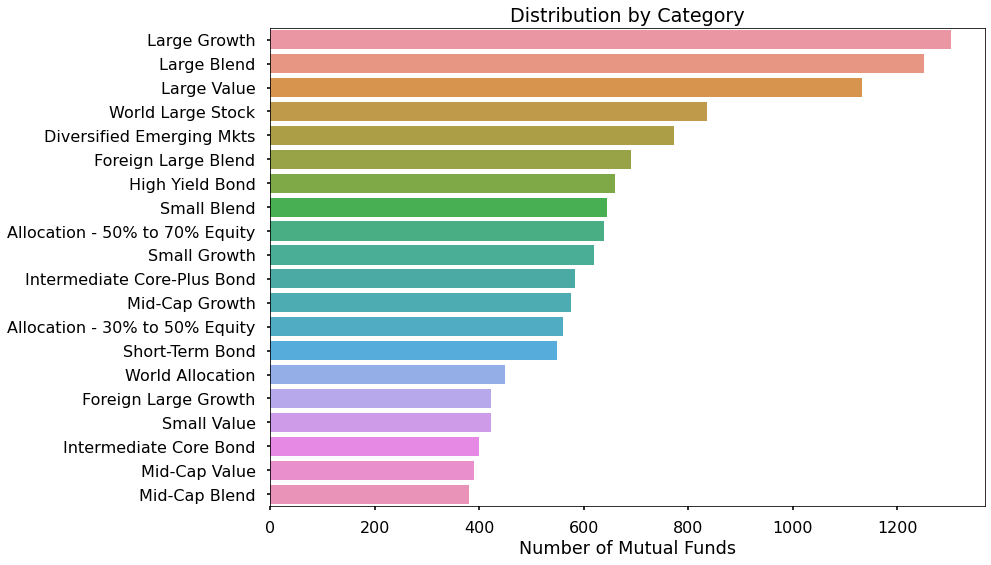

In [33]:
#Mutual funds distribution by category 
plt.xlabel('Number of Mutual Funds')
distribution_by_category(df_mf)

This graph shows us the distribution of the number of funds that make up each category. A fund category is a way of differentiating mutual funds according to their investment objectives and principal investment features. This categorization allows investors to spread their money around in a mix of funds with a variety of risk and return characteristics. 

An obvious thing that can be seen in these two graphs is the large number of Mutual Funds relative to the number of ETFs. Both Mutual Funds and ETFs have a large proportion of large blend and large value funds. The leading category for Mutual Funds is Large Growth funds while Large Growth funds make up a smaller proportion of ETFs. A prominent proportion of Mutual funds are in the Bond category: Short-term bonds, Intermediate Core bonds, etc. We saw that ETFs only have about 10% of their assets in bonds, so it makes sense the proportion of ETFs in the bond category is very low. The categories for ETFs are very sector heavy, while Mutual funds dont have sectors coming up often in their categories -- this is because the fundamental property of EtFs being based off an index which usually span entire sectors.

### __Quantative Comparison of Data Across Categorical Variables__

Box and whisker plots allow for comparison of data from different categories easier

__Fund Size and Short Term Fund Return:__


 Distribution of fund_return_1year according to size_type in ETFs:



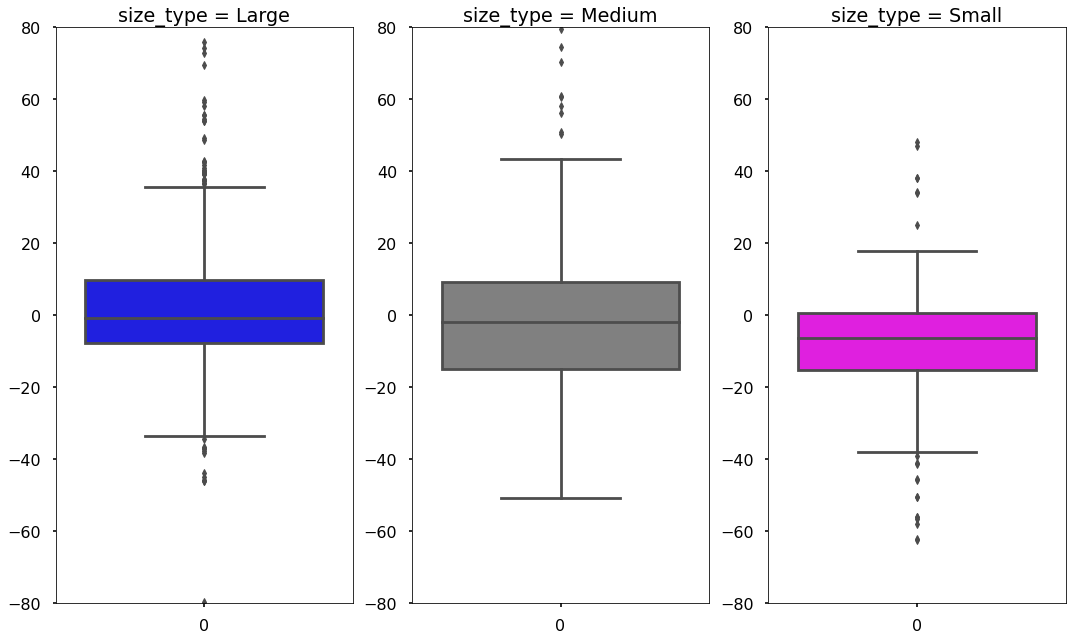

In [34]:
#ETF Fund size vs. 1 year fund return
joined=pd.merge(df_etf,df_etf_return_history)
dep_by_indep_boxplot(joined,'size_type','fund_return_1year','ETFs',-80,80)

These box and whisker plots show their might be a difference in short term ETF fund return and size of the ETF. The Large ETFs have a 1 year mean fund return much higher than that of the mean 1 year fund return for small ETFs. The Interquartile range is pretty large for each of the fund sizes and this is to be expected because 1 year of returns is not a long enough time to determine the performance of a fund, as you can expect more variation in outcome because of the limited time frame. If we were to make a boxplot of 10year return, the interquartile range would shrink drastically. 


 Distribution of fund_return_1year according to size_type in Mutual Funds:



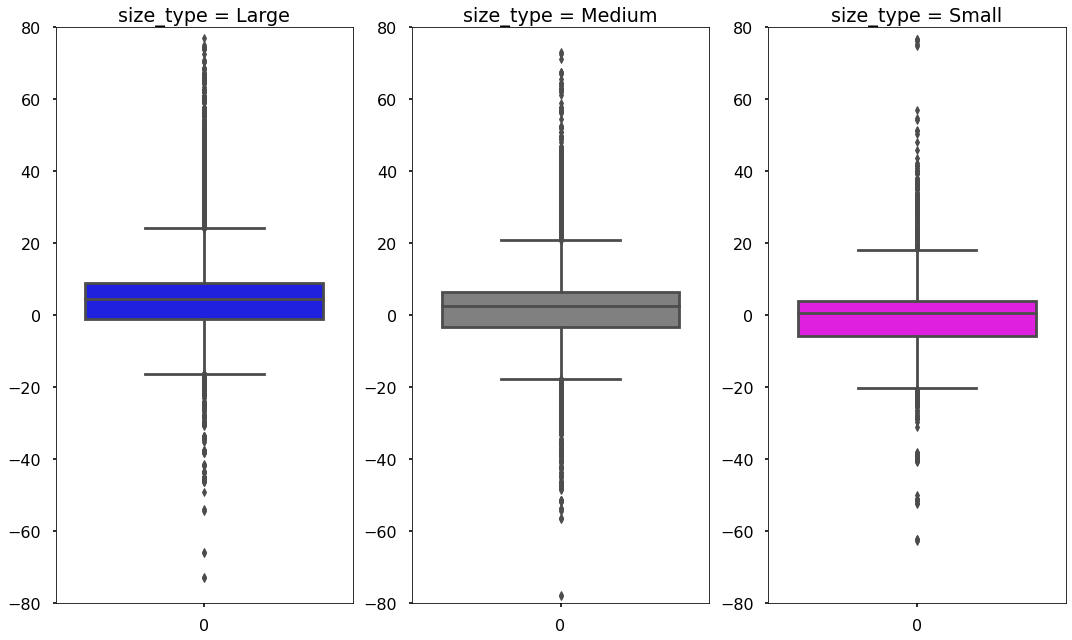

In [35]:
#Mutual Fund size vs. 1 year fund return
joined=pd.merge(df_mf,df_mf_return_history)
dep_by_indep_boxplot(joined,'size_type','fund_return_1year','Mutual Funds',-80,80)

A profound difference in the Box and Whisker plots of Mutual funds is the difference in Interquarile ranges. The interquartile range for each fund size is significantly less than the interquartile ranges for ETFs. The lengths of the whiskers for Mutual funds are also much longer than the whiskers for the ETFs, showing their is more variance in short term fund reurn for ETFs than Mutual Funds. The number of outliers with Mutual Funds is significantly higher than the number of outliers for the ETF, and this is likely due to the higher number of funds in the Mutual Funds than ETFs. 

__Investment Type and Fund Return Year to Date:__


 Distribution of fund_return_ytd according to investment_type in ETFs:



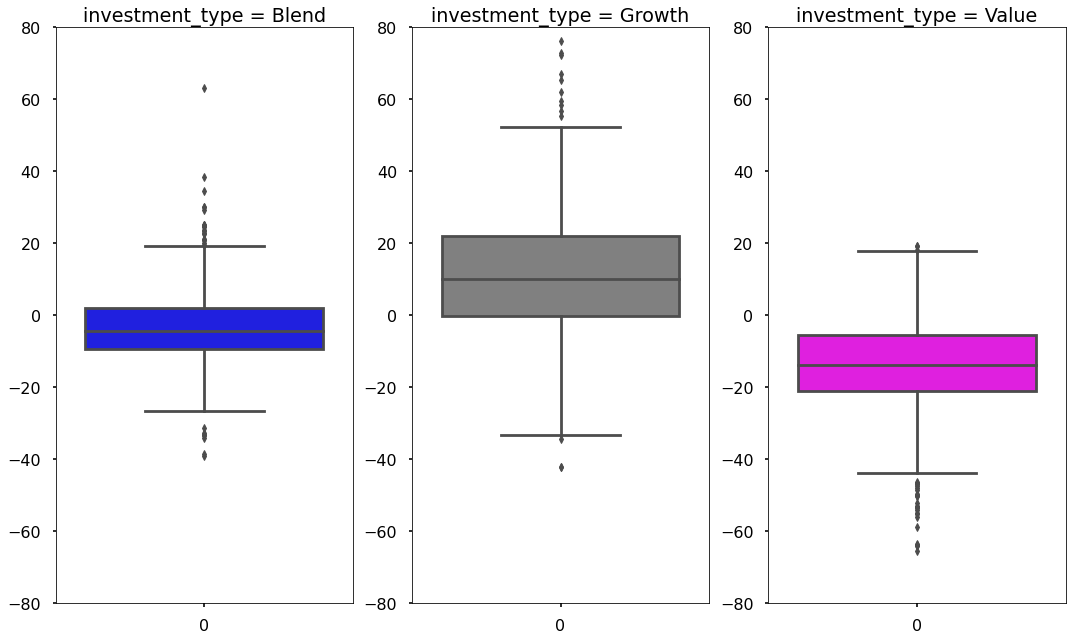

In [36]:
#Investment type vs. ETF YTD return
joined=pd.merge(df_etf,df_etf_return_history)
dep_by_indep_boxplot(joined,'investment_type','fund_return_ytd','ETFs',-80,80)

This graph shows us the distribution of the fund returns in the past years time based on the investment type of a fund. From this we can see that growth funds have median short term returns much higher than that of the returns for the other categories. The interquartile ranges for each of the investment types seem to be about the same, so the difference within the investment type categories is about the same for all categories. Value funds notably have more outliers on the lower end of their plot than the other investment types, and they have more outliers than all the other investment types. Outliers for Growth and Value funds could be eiter a good or bad thing, you could have more fund returns than normal or less fund returns for normal. For value funds an outlier is surely a bad thing, as you will likely have an underperforming fund.



# __Pre-registration of Analyses:__

1. Highest Corrs
2. Predictive Variable (Casey) (chi-square test, log reg)
3. Time Frame (David)
4. Time Frame(Cam) (log reg2)
5. Sector (Cam) (log reg 3)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# __Analysis of sectors of investment:__

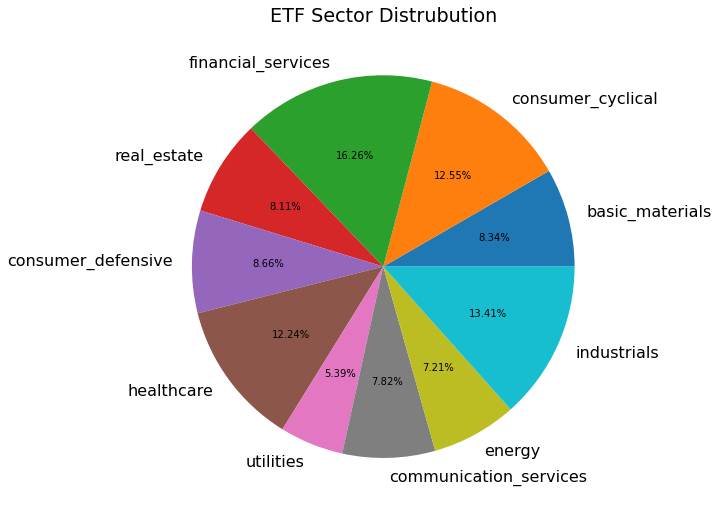

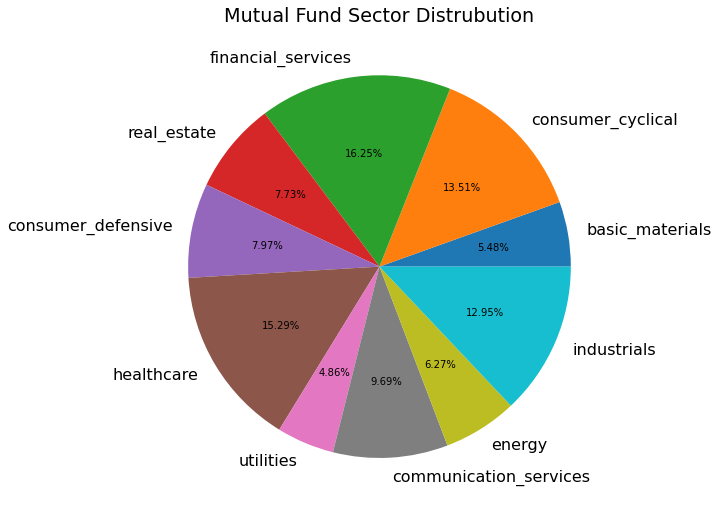

In [37]:
cols=[i for i in df_mf_sector.columns[1:11]]
plt.title('ETF Sector Distrubution')
percent_comp_bar(df_etf_sector,cols,'sector_')
plt.title('Mutual Fund Sector Distrubution')
percent_comp_bar(df_mf_sector,cols,'sector_')



As we can see from the pie charts, the average sector holdings between both Mutual Funds and Exchange Traded Funds are very similar. The biggest margin of difference in sector holdings is about 3%. The biggest differences between sector holdings are that ETF's seem to have a 3% greater investment in companies in the basic materials sector and Mutual funds have roughly a 3% greater involvement in technology,healthcare, and communication services. We will perform a regression to see how correlated percent investment in each financial sector is with fund returns and if this slight difference in sector investment has an impact on fund returns.



Doing a single regression on sector investment and fund returns:


In [38]:
sectors=['sector_basic_materials','sector_consumer_cyclical','sector_financial_services','sector_real_estate',
        'sector_communication_services','sector_energy',
        'sector_industrials','sector_technology','sector_healthcare']

mfjoined=pd.merge(df_mf,df_mf_sector).dropna()
mfjoined=mfjoined.merge(df_mf_return_history).dropna()

mfs=get_correlations(mfjoined,sectors,'fund_return_ytd')


etfjoined=pd.merge(df_etf,df_etf_sector).dropna()
etfjoined=etfjoined.merge(df_etf_return_history).dropna()

etfs=get_correlations(etfjoined,sectors,'fund_return_ytd')

etfs.head()


,correlation
sector_basic_materials,0.0006
sector_consumer_cyclical,0.0580
sector_financial_services,0.0572
sector_real_estate,0.0317
sector_communication_services,0.0634


cleaning up the column names:

In [39]:
names=['Materials','Consumer Cyclical','Financial Services','Real Estate','Communication services','Energy','Industrials','Technology','Healthcare']
mfs.set_axis(names,axis=0,inplace=True)
etfs.set_axis(names,axis=0,inplace=True)

Visualizing the correlations for Mutual Funds:

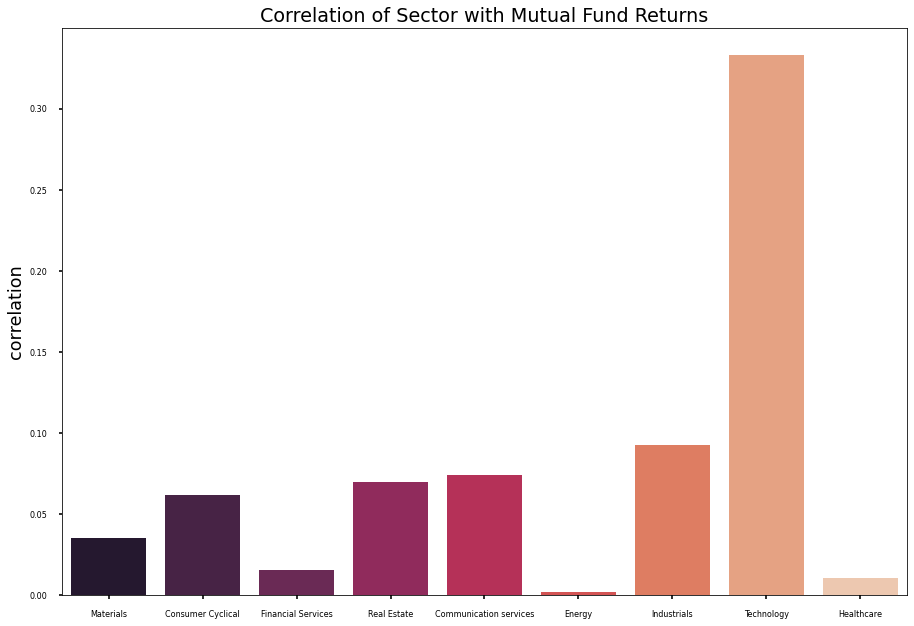

In [40]:
corr_visualize(mfs,.001,'Correlation of Sector with Mutual Fund Returns',8)

Visualizing the correlations for ETFS:

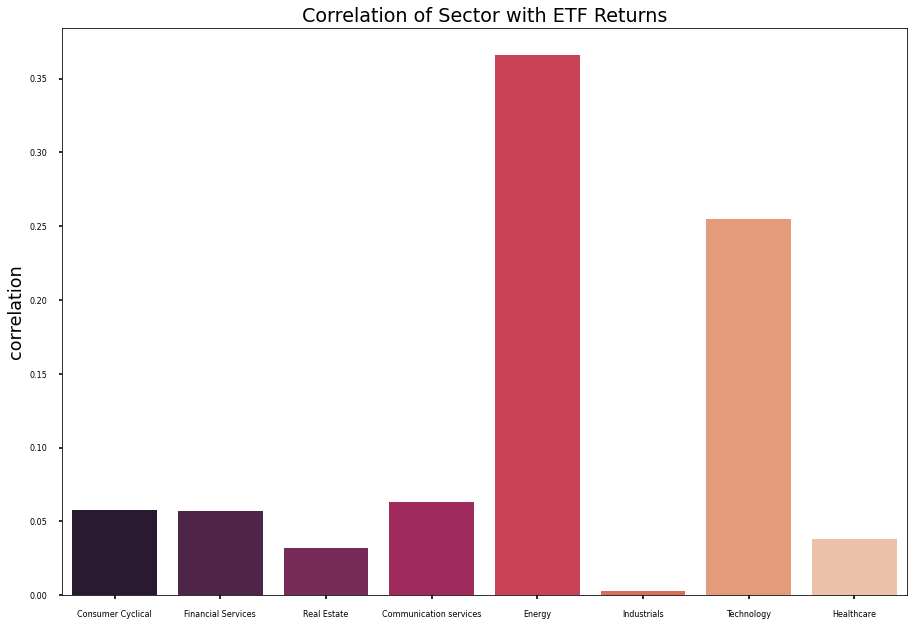

In [41]:
corr_visualize(etfs,.001,'Correlation of Sector with ETF Returns',8)


Visualizing the correlatons side by side:

(0.01, 0.4)

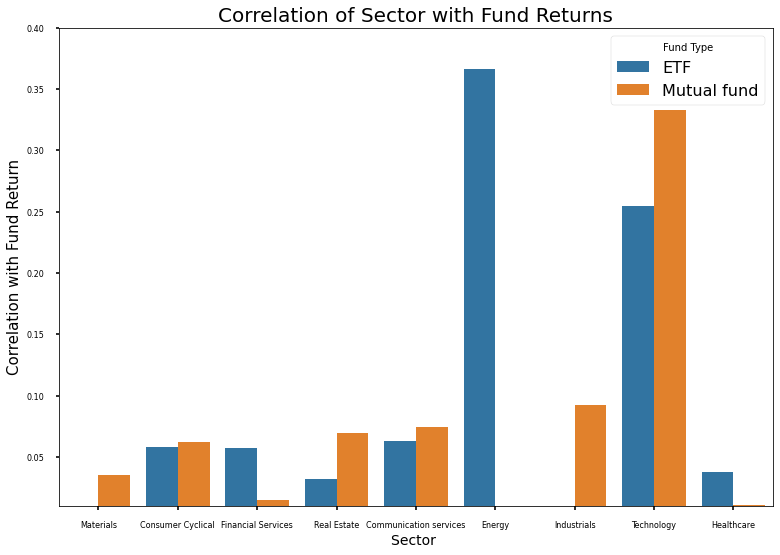

In [42]:
mfs['Fund Type']='Mutual fund'
etfs['Fund Type']='ETF'


sectors=['sector_basic_materials','sector_consumer_cyclical','sector_financial_services','sector_real_estate',
        'sector_communication_services','sector_energy',
        'sector_industrials','sector_technology','sector_healthcare']
bothsects=pd.concat([etfs,mfs])
g=sns.barplot(x=bothsects.index,y=bothsects['correlation'],data=bothsects,hue='Fund Type')
plt.tick_params(labelsize=8)

plt.title("Correlation of Sector with Fund Returns", fontsize = 20)
plt.xlabel("Sector ", fontsize = 14)
plt.ylabel("Correlation with Fund Return", fontsize = 15)
g.set_ylim(.01,.40)

As we can see from the visualization, sector investment generally has a positive and very weak correlation with fund returns. The highest correlation between sector investment and fund return is for technology investments. While this correlation is the strongest, it has a weak to moderate postitive correlation with fund returns with an r value of only .30 for ETFs and .35 for Mutual Funds. A shocking discovery is that investments in the energy sector is weakly to moderatetly correlated with fund returns for ETFs and not at all correlated to returns in Mutual Funds! In our breakdown of sector investment differences between Mutual Funds and ETFs we noted that Mutuals Funds invested more in technology,health care,and communication sectors and ETFs invested more in the basic materials sector. In our correlations we can see that investment in any of these sectors, besides the technology sector, had almost no correlation with fund returns. The differences in fund returns on a whole for Mutual Funds and ETFs then cannot be generally attributed to a difference in investment sectors.


Investors who have a positive outlook on energy stocks and want that sector to be well represented in the fund portfolio should likely look to invest in ETFs over Mutual Funds. Investment in the energy sector seemingly generates no returns for Mutual funds, and this could possibly be contributed to a variety of differences in the structure of mutual fund management. ETFs might have the advantage of allowing very diverse investment within the energy sector and are more likely to capture the rewards from the sector as a whole, while Mutual Funds may pick and choose certain energy companies they want to invest in - and they must have picked these companies poorly over the last decade. The overwhelming success of energy stocks such as Tesla have been downplayed and heavily shorted by fund managers, and this may explain why Mutual Funds don't seem to generate as much returns from the energy sector as ETFs do.

# __Coefficient of Correlation__

paragraph

<AxesSubplot:>

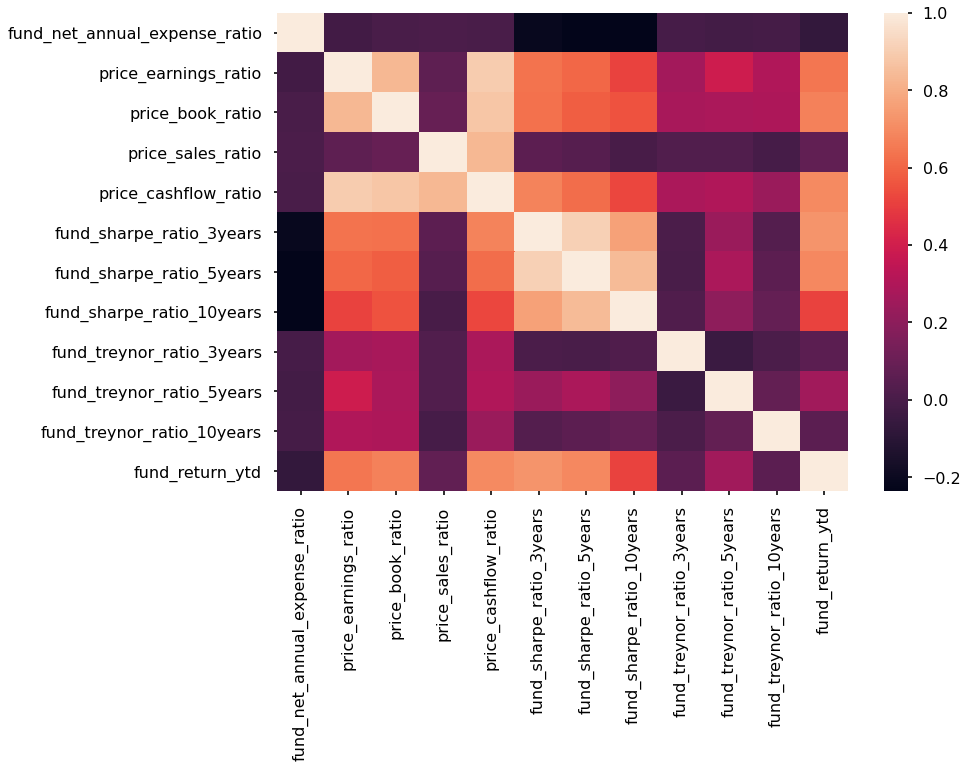

In [43]:
#Using a heatmap to find the variables most correlated ratios to fund returns for MFs
new_df_mf = df_mf.drop(['fund_symbol', 'fund_extended_name', 'investment_strategy', 'category'], axis = 1)
new_df_mf.inception_date = pd.to_datetime(new_df_mf.inception_date)

new_df_mf_ratios = df_mf_ratios.drop(['fund_symbol'], axis = 1)
new_df_mf_ratios['fund_return_ytd'] = new_df_mf['fund_return_ytd']
new_df_mf = pd.get_dummies(new_df_mf)
sns.heatmap(new_df_mf_ratios.corr())

<AxesSubplot:>

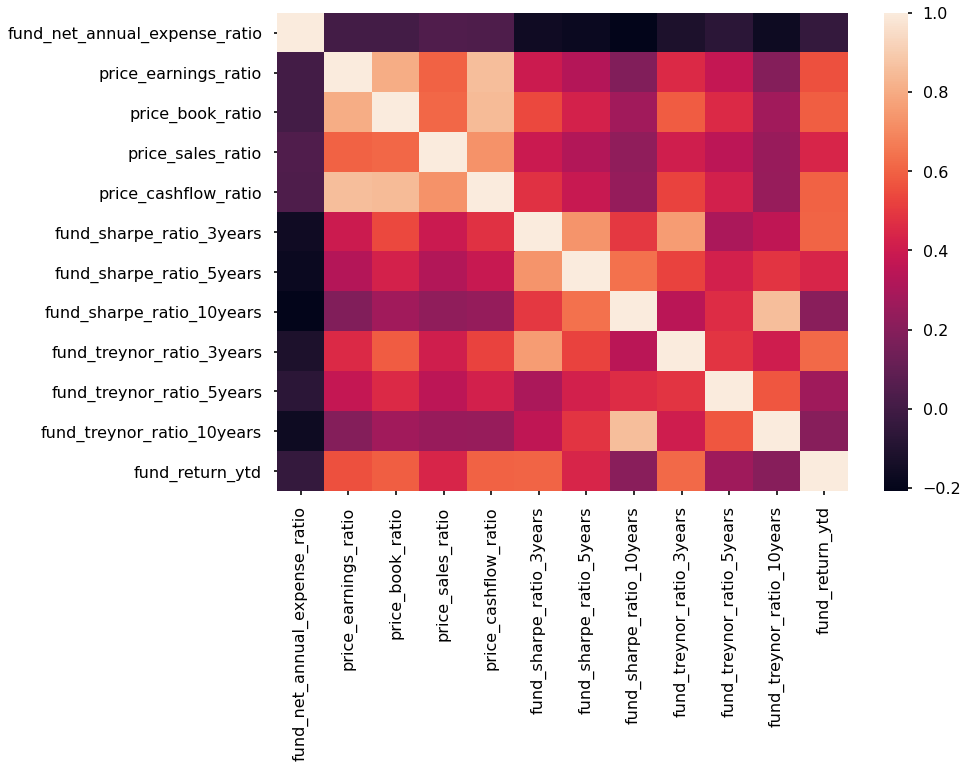

In [44]:
#Using a heatmap to find the variables most correlated ratios to fund returns for ETFs
new_df_etf = df_etf.drop(['fund_symbol', 'fund_extended_name', 'investment_strategy', 'category'], axis = 1)
new_df_etf.inception_date = pd.to_datetime(new_df_etf.inception_date)

new_df_etf_ratios = df_etf_ratios.drop(['fund_symbol'], axis = 1)
new_df_etf_ratios['fund_return_ytd'] = new_df_etf['fund_return_ytd']
new_df_etf = pd.get_dummies(new_df_etf)
sns.heatmap(new_df_etf_ratios.corr())

In [45]:
#Random Forest Regressor to find which ratios are most important to consider when investing in mutual funds. 
model3 = RandomForestRegressor()
new_mf_rats = new_df_mf_ratios.dropna()
y3 = new_mf_rats['fund_return_ytd']
X3 = new_mf_rats.drop(['fund_return_ytd'], axis = 1)
#X2['inception_date'] = X2['inception_date'].apply(lambda x: x.toordinal())
model3.fit(X3,y3)

mf_feat = pd.DataFrame(np.array(model3.feature_importances_).T, index = X3.columns, columns = ['feature_importances']).sort_values(ascending = False, by = 'feature_importances')
mf_feat['correlations'] = new_mf_rats.corr()['fund_return_ytd'].drop(['fund_return_ytd'])

exog3 = sm.add_constant(X3,prepend = False)
linearmodel3 = sm.OLS(y3, exog3)
result3 = linearmodel3.fit()
print(result3.summary())

mf_feat['p_values'] = pd.Series(result3.pvalues.round(3)).drop('const')
mf_feat

                            OLS Regression Results                            
Dep. Variable:        fund_return_ytd   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     4114.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        23:29:07   Log-Likelihood:                -39045.
No. Observations:               12072   AIC:                         7.811e+04
Df Residuals:                   12060   BIC:                         7.820e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
fund_net_annua

,feature_importances,correlations,p_values
fund_sharpe_ratio_3years,0.492470,0.845942,0.000
fund_treynor_ratio_3years,0.301276,0.328614,0.000
fund_treynor_ratio_10years,0.034574,0.294740,0.000
price_cashflow_ratio,0.033518,0.735006,0.000
price_earnings_ratio,0.026828,0.693935,0.549
price_book_ratio,0.026420,0.743673,0.000
fund_treynor_ratio_5years,0.023874,0.490889,0.018
fund_sharpe_ratio_10years,0.022357,0.562443,0.000
price_sales_ratio,0.021644,0.580667,0.000
fund_sharpe_ratio_5years,0.010867,0.788614,0.000


In [46]:
#Random Forest Regressor to find which ratios are most important to consider when investing in ETFs. 
model4 = RandomForestRegressor()
new_etf_rats = new_df_etf_ratios.dropna()
y4 = new_etf_rats['fund_return_ytd']
X4 = new_etf_rats.drop(['fund_return_ytd'], axis = 1)
#X2['inception_date'] = X2['inception_date'].apply(lambda x: x.toordinal())
model4.fit(X4,y4)

etf_feat = pd.DataFrame(np.array(model4.feature_importances_).T, index = X4.columns, columns = ['feature_importances']).sort_values(ascending = False, by = 'feature_importances')
etf_feat['correlations'] = new_etf_rats.corr()['fund_return_ytd'].drop(['fund_return_ytd'])

exog4 = sm.add_constant(X4,prepend = False)
linearmodel4 = sm.OLS(y4, exog4)
result4 = linearmodel4.fit()
print(result4.summary())

etf_feat['p_values'] = pd.Series(result4.pvalues.round(3)).drop('const')
etf_feat

                            OLS Regression Results                            
Dep. Variable:        fund_return_ytd   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     141.6
Date:                Wed, 12 May 2021   Prob (F-statistic):          4.21e-203
Time:                        23:29:07   Log-Likelihood:                -4350.6
No. Observations:                1132   AIC:                             8725.
Df Residuals:                    1120   BIC:                             8785.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
fund_net_annua

,feature_importances,correlations,p_values
fund_treynor_ratio_3years,0.437309,0.686036,0.000
price_earnings_ratio,0.133529,0.579271,0.000
price_book_ratio,0.124980,0.577778,0.489
fund_net_annual_expense_ratio,0.070381,0.005428,0.000
price_cashflow_ratio,0.067056,0.596354,0.000
price_sales_ratio,0.051328,0.436207,0.063
fund_sharpe_ratio_3years,0.045414,0.638317,0.458
fund_treynor_ratio_5years,0.035901,0.509275,0.000
fund_sharpe_ratio_5years,0.013238,0.446727,0.001
fund_treynor_ratio_10years,0.011287,0.214363,0.000


In [47]:
#Sorting by decreasing value so first entries are the highest correlated variables
df_mf_highest_corrs=mf_feat.sort_values(by=['correlations'],ascending=False)
df_etf_highest_corrs=etf_feat.sort_values(by=['correlations'],ascending=False)

etf_vars=df_etf_highest_corrs.index[:7]
mf_vars=df_mf_highest_corrs.index[:7]

#First instance of df_mf3/df_etf3
df_mf3[mf_vars]=StandardScaler().fit_transform(df_mf3[mf_vars])
df_etf3[etf_vars]=StandardScaler().fit_transform(df_etf3[etf_vars])



df_mf3['ytd_score']=0
df_etf3['ytd_score']=0

for var in mf_vars:   
    mf_score=df_mf3[var]*(df_mf_highest_corrs.loc[var,'correlations'])
    df_mf3['ytd_score']+=mf_score
    #print(mf_score)


for var in etf_vars:   
    etf_score=df_etf3[var]*(df_etf_highest_corrs.loc[var,'correlations'])
    df_etf3['ytd_score']+=etf_score
    #print(etf_score)

    
#more columns to include in final dfs
fund=['fund_return_3years','fund_return_5years','fund_return_10years','fund_mean_annual_return_3years']
cats=['category_return_3years','category_return_5years','category_return_10years']

mf_cols=df_mf.columns.to_list()
mf_cols.extend(mf_vars)
mf_cols.extend(cats)
mf_cols.extend(fund)
mf_cols.append('ytd_score')
mf_cols.append('category_return_ytd')
mf_final=pd.DataFrame()
for col in mf_cols:
    mf_final[col]=df_mf3[col]

etf_cols=df_etf.columns.to_list()
etf_cols.extend(etf_vars)
etf_cols.extend(cats)
etf_cols.extend(fund)
etf_cols.append('ytd_score')
etf_cols.append('category_return_ytd')
etf_final=pd.DataFrame()
for col in etf_cols:
    etf_final[col]=df_etf3[col]

In [48]:
mf_final.dropna(subset=['category_return_ytd'],inplace=True)
#Adding column to MF dataframe that tells whether it is above average return for ytd, 3years, 5years, 10 years
ytd_index=mf_final.columns.get_loc('fund_return_ytd')
cat_ytd_index=mf_final.columns.get_loc('category_return_ytd')

greater_list=[]
for i in range(mf_final.shape[0]):
    if (mf_final.iloc[i,ytd_index]< mf_final.iloc[i,cat_ytd_index]):
        greater_list.append(0)
    else:
        greater_list.append(1)

mf_final['>average']=greater_list


In [49]:
#Adding column to ETF dataframe that tells whether it is above average return
etf_final.dropna(subset=['category_return_ytd'],inplace=True)
ytd_index=etf_final.columns.get_loc('fund_return_ytd')
cat_ytd_index=etf_final.columns.get_loc('category_return_ytd')

greater_list=[]
for i in range(etf_final.shape[0]):
    if (etf_final.iloc[i,ytd_index]< etf_final.iloc[i,cat_ytd_index]):
        greater_list.append(0)
    else:
        greater_list.append(1)

etf_final['>average']=greater_list


Predictors: ytd_score


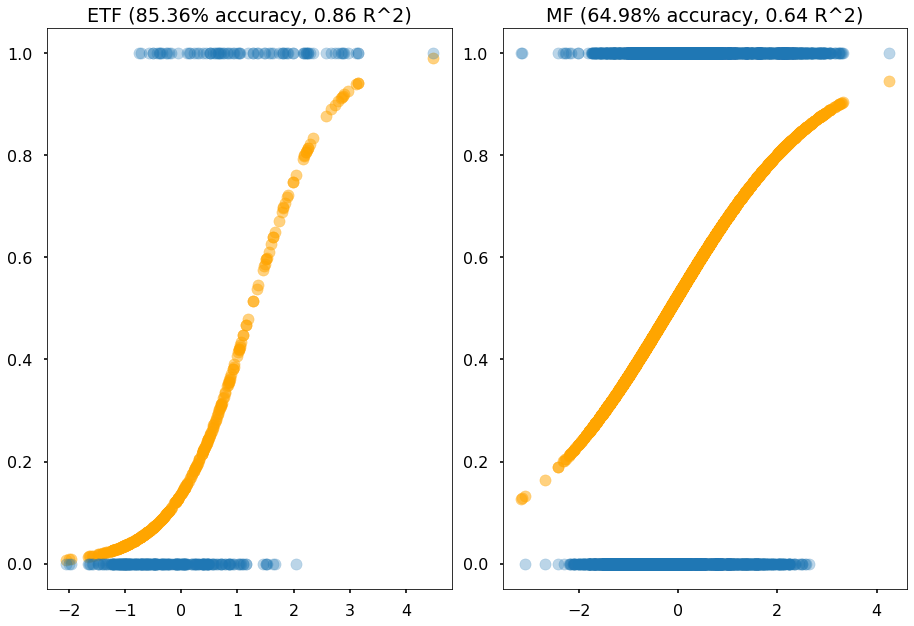

In [50]:
log_prob(etf_final,mf_final,'ytd_score','>average')

### Investment Type Analysis

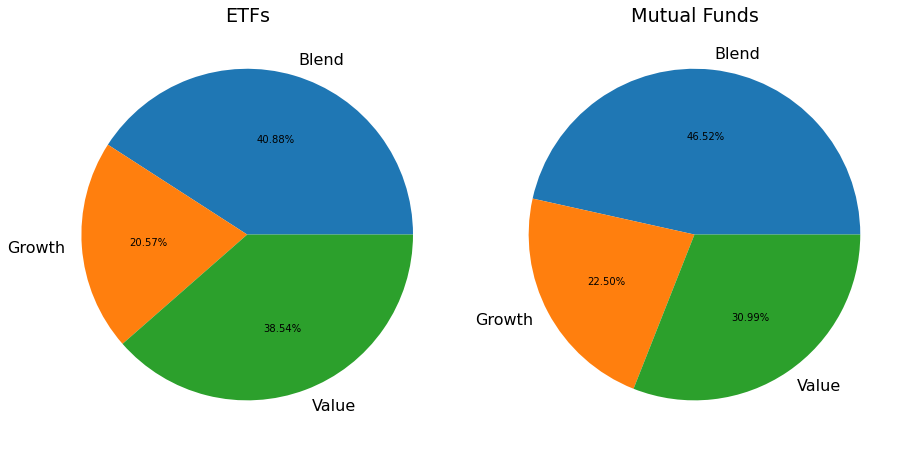

In [51]:
comparison_pies(df_etf,df_mf,'investment_type','ETFs','Mutual Funds')

How do the returns over time compare between these fund investing styles?

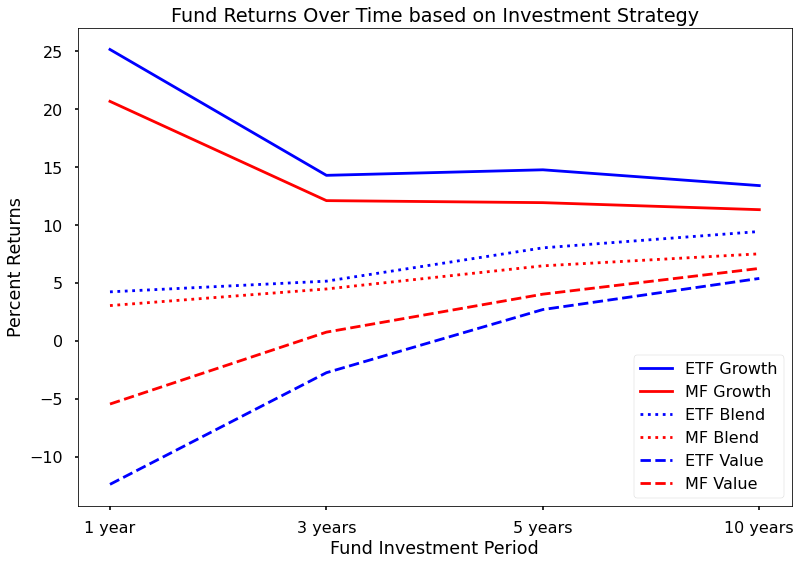

In [52]:
#sorting by investment type
mfGrowth=df_mf.where(df_mf['investment_type']=='Growth')
mfValue=df_mf.where(df_mf['investment_type']=='Value')
mfBlend=df_mf.where(df_mf['investment_type']=='Blend')

etfGrowth=df_etf.where(df_etf['investment_type']=='Growth')
etfValue=df_etf.where(df_etf['investment_type']=='Value')
etfBlend=df_etf.where(df_etf['investment_type']=='Blend')


#merging fund history
etfGrowth=pd.merge(etfGrowth,df_etf_return_history).dropna()
etfValue=pd.merge(etfValue,df_etf_return_history).dropna()
etfBlend=pd.merge(etfBlend,df_etf_return_history).dropna()



mfGrowth=pd.merge(mfGrowth,df_mf_return_history).dropna()
mfValue=pd.merge(mfValue,df_mf_return_history).dropna()
mfBlend=pd.merge(mfBlend,df_mf_return_history).dropna()




etfGrowthReturns=etfGrowth[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
etfValueReturns=etfValue[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
etfBlendReturns=etfBlend[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()

mfGrowthReturns=mfGrowth[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
mfValueReturns=mfValue[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
mfBlendReturns=mfBlend[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
names=['1 year','3 years','5 years','10 years']

etfGrowthReturns.set_axis(names,axis=0,inplace=True)
etfValueReturns.set_axis(names,axis=0,inplace=True)
etfBlendReturns.set_axis(names,axis=0,inplace=True)

mfGrowthReturns.set_axis(names,axis=0,inplace=True)
mfValueReturns.set_axis(names,axis=0,inplace=True)
mfBlendReturns.set_axis(names,axis=0,inplace=True)



plt.plot(etfGrowthReturns,color = 'blue')
plt.plot(mfGrowthReturns,color = 'red')


plt.plot(etfBlendReturns,color = 'blue',ls='dotted')
plt.plot(mfBlendReturns,color = 'red',ls='dotted')

plt.plot(etfValueReturns,color = 'blue',ls='dashed')
plt.plot(mfValueReturns,color = 'red',ls='dashed')




plt.title('Fund Returns Over Time based on Investment Strategy')
plt.ylabel('Percent Returns')
plt.xlabel('Fund Investment Period')
plt.legend(['ETF Growth','MF Growth','ETF Blend','MF Blend','ETF Value','MF Value'])



This graph shows the surpising differences in fund returns based on Investment strategy. Funds with growth strategies have overwhelming amounts of fund returns in the first year of investment and then their returns rapidly decline after 1 year. Within growth funds, ETF's have a significant advantage over Mutual Funds for all investment periods. ETFs have on average 10% better returns at 1 year and roughly 5% better returns after 1 year. For blend funds the returns start slightly above zero and steadily increase all the way to 10 years. There is almost no difference between Mutual Funds and ETFs for blend funds. The blend funds exhibit a shape very similar to the returns over time for each respective fund shown previously, and this is because blend funds make up the majority percentage of fund strategies. Value funds start off with very large negative returns and rapidly increase after 1 year and cross into the positive return threshold at about 2 years for mutual funds and 4 years for ETFs. Value funds have negative returns because they pay their shareholders a higher dividend compared to blend funds, who pay a small dividend, and Growth funds who usually pay close to no dividends.

In order to get a more accurate representation of the Total fund returns we should consider the fund yield, which shows the interest and dividends the fund pays throughout the course of a single year.

In [53]:
#sorting by investment type
mfGrowth=mf_final.where(df_mf['investment_type']=='Growth')
mfValue=mf_final.where(df_mf['investment_type']=='Value')
mfBlend=mf_final.where(df_mf['investment_type']=='Blend')

etfGrowth=etf_final.where(df_etf['investment_type']=='Growth')
etfValue=etf_final.where(df_etf['investment_type']=='Value')
etfBlend=etf_final.where(df_etf['investment_type']=='Blend')


#merging fund history
etfGrowth=pd.merge(etfGrowth,df_etf).dropna()
etfValue=pd.merge(etfValue,df_etf).dropna()
etfBlend=pd.merge(etfBlend,df_etf).dropna()

mfGrowth=pd.merge(mfGrowth,df_mf).dropna()
mfValue=pd.merge(mfValue,df_mf).dropna()
mfBlend=pd.merge(mfBlend,df_mf).dropna()



#taking the average fund yield for each
etfGrowthYield=etfGrowth['fund_yield'].mean()
etfBlendYield=etfBlend['fund_yield'].mean()
etfValueYield=etfValue['fund_yield'].mean()

mfGrowthYield=mfGrowth['fund_yield'].mean()
mfBlendYield=mfBlend['fund_yield'].mean()
mfValueYield=mfValue['fund_yield'].mean()

Yields=[etfGrowthYield,etfBlendYield,etfValueYield,mfGrowthYield,mfBlendYield,mfValueYield]

mean_returns=[etfGrowth.fund_mean_annual_return_3years.mean(),etfBlend['fund_mean_annual_return_3years'].mean(),etfValue['fund_mean_annual_return_3years'].mean(),
              mfGrowth['fund_mean_annual_return_3years'].mean(),mfBlend['fund_mean_annual_return_3years'].mean(),mfValue['fund_mean_annual_return_3years'].mean()]
#putting data into a dataframe
data = {'Fund type and Strategy': ['ETF Growth ','ETF Blend','ETF Value','MF Growth ','MF Blend','MF Value'],
        'Fund Yield': Yields[:],
        'Fund Mean Annual Return 3years': mean_returns
        }

yield_and_return = pd.DataFrame(data, columns = ['Fund type and Strategy', 'Fund Yield','Fund Mean Annual Return 3years'])

yield_and_return


,Fund type and Strategy,Fund Yield,Fund Mean Annual Return 3years
0,ETF Growth,0.694560,1.242410
1,ETF Blend,1.673768,0.572754
2,ETF Value,3.028810,0.151508
3,MF Growth,0.512147,1.087083
4,MF Blend,1.622756,0.454559
5,MF Value,2.224984,0.148252


In [54]:
#We see that fund yield and fund return work in opposite directions

Predictors: ytd_score


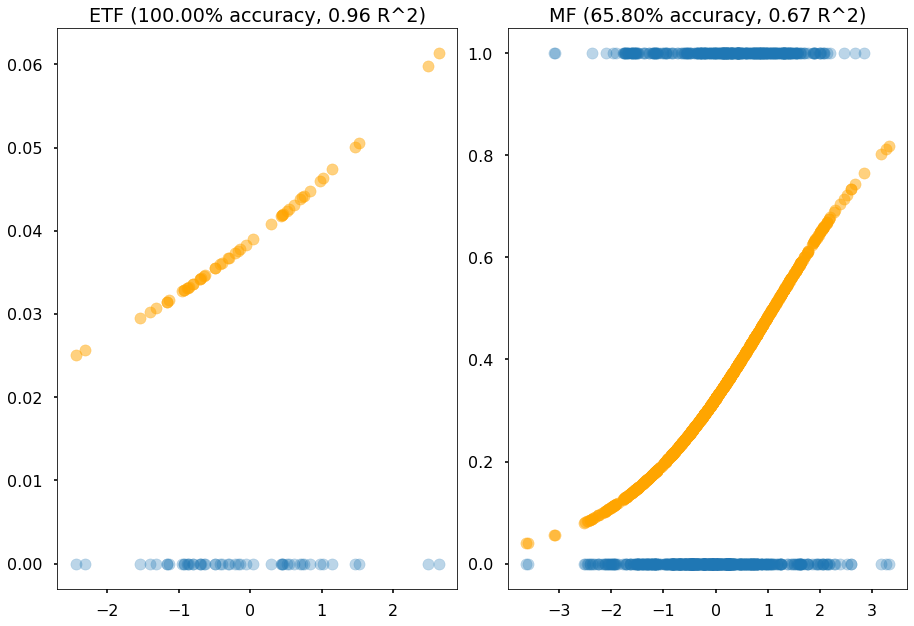

In [55]:
#Now that we have observed that growth funds are superior in 1 year time frame, we will try to measure how much more effective it is.
mf_growth= mf_final[mf_final['investment_type']=='Value'].dropna()
etf_growth= etf_final[etf_final['investment_type']=='Value'].dropna()
log_prob(etf_growth,mf_growth,'ytd_score','>average')

These yields tell us the amount of interest and dividends the fund returns to its investors, it is a metric worth considering when analyzing the returns of a fund as it tells you information on how much the fund 'pays' you for staying in your investment position. Value fund's give back more money in the form of dividends and interest, thus sacrificing some returns. Growth funds hardly give any dividends at all, instead funneling money back into the fund to increase fund return. Looking at the Yields of each of these funds with their respective strategy we can see that both ETF growth funds and growth Mutual Funds have very similar fund yields. Blend funds have very similar yields for both Mutual funds and ETFs as well. The only substantial difference in fund yield comes for value funds: Value Mutual Funds have a 1% lower fund yield than value ETFs do.

For an investor looking to hold their fund position __for a short amount of time (<1 year) it is strongly recommended that they invest in a growth ETF fund.__ Growth ETFs have significantly higher returns and with their competitive dividend rate, the investor can expect the ETF growth fund to generate much more returns than it's Mutual Fund's counterpart within a years time. Outside of a years time, ETF growth funds likely outperform growth Mutual Funds for almost all time frames when factoring in the Mutual Fund's higher management costs, but the difference in returns becomes less profound outside of a years time and the investor must consider the specific mutual funds management costs.

For an investor looking to hold their fund position for __anywhere between 1 and 5 years our analysis shows that growth ETFs are likely still the best choice.__ While the fund returns begin to drop off after a years time, the fund returns are still far and above the fund returns of any other investment option.

For investing in the period 5-10 years the fund returns for each fund type and investment strategy begin to converge. This means clear cut winners in terms of best returns is not as obvious as best investments in the short term. The viability of the value fund starts to become clear towards the end of this investing period. Value funds are consistently above zero returns in this time and are paying hefty dividends, and as the returns become similar for all other investment strategies the significantly higher dividends of value funds start to make a big difference. The type of value fund that should be choosen is then the fund with the highest yield, and on average that is the ETF value fund. ETF value funds are debately the best options for investment in the period 5-10 years and get better as more time passes. __For long term investing the ETF value fund is the fund option with the highest returns.__

## __Time Frame Analysis__

# __Analysis of predictive accuracy over short,medium, long term__


A common question amongst individuals investing in a fund is how long to hold that specific fund position. Based off the various financial circumstances of each investor, fund positions can be held for various lengths of time. In this section we look for the ideal length of time to hold fund positions for each of the fund types, and an answer to the general question if there is a superior fund type for investing for a known length of time.

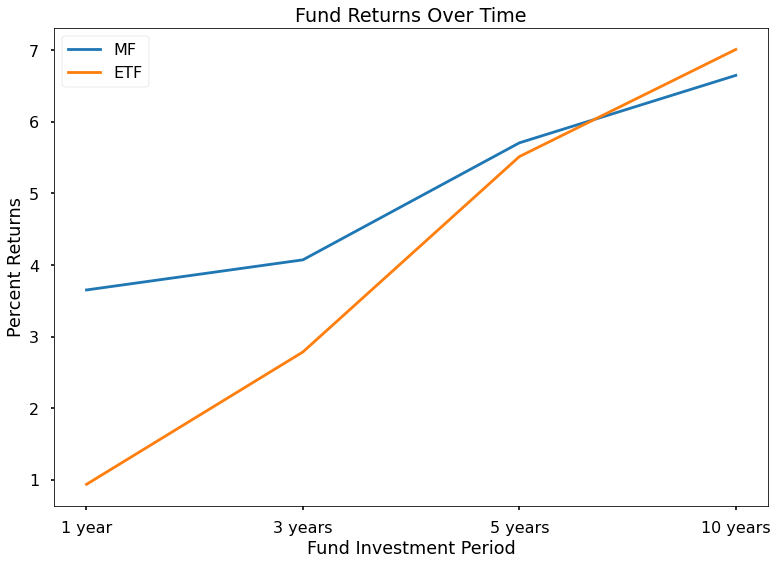

In [56]:
mfReturns=df_mf_return_history[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()
etfReturns=df_etf_return_history[['fund_return_1year','fund_return_3years','fund_return_5years','fund_return_10years']].mean()


names=['1 year','3 years','5 years','10 years']
mfReturns.set_axis(names,axis=0,inplace=True)
etfReturns.set_axis(names,axis=0,inplace=True)


plt.plot(mfReturns)
plt.plot(etfReturns)

plt.title('Fund Returns Over Time')
plt.ylabel('Percent Returns')
plt.xlabel('Fund Investment Period')
plt.legend(['MF','ETF'])


As we can see from this graph, Mutual Funds initially have greater returns than ETFs for the first 3 years of holding the fund position. This is because the active management style of Mutual Funds allows the fund to be more agile and reactive in their decisions, leading to more profitable returns in the short term. After 5 years of holding the fund investment ETF returns start to eclipse the returns of Mutual Funds, and from the period of 5 to 10 years the returns of ETFs are greater than that of mutual funds.

There are several different 'kinds' of fund types. The main 3 types are growth funds, value funds, and blend funds. Growth funds are funds associate with a higher risk rating in order to potentially gain more rewards. Value funds are often cheaper than growth funds and pay a dividend to its shareholders. While Blend funds are a mix of the two.

In [ ]:
#First instance of df_mf3,df_etf3
mf_short= cleanbykeyword(df_mf2,'3years').dropna()
mf_med= cleanbykeyword(df_mf2,'5years').dropna()
mf_long= cleanbykeyword(df_mf2,'10years').dropna()

etf_short= cleanbykeyword(df_etf2,'3years').dropna()
etf_med= cleanbykeyword(df_etf2,'5years').dropna()
etf_long= cleanbykeyword(df_etf2,'10years').dropna()

#short term
predictors=mf_short.columns.to_list()[2:]
#print('Predictors: {}'.format(predictors))
mf_short_corrs=bootstrap_correlations(mf_short,predictors,'fund_return_3years',60,50)
#corr_visualize(mf_short_corrs,.1,'MFs short term',12)


predictors=etf_short.columns.to_list()[2:]
etf_short_corrs=bootstrap_correlations(etf_short,predictors,'fund_return_3years',60,50)
#corr_visualize(etf_short_corrs,.2,'ETFs short term',10)

#med term
predictors=mf_med.columns.to_list()[2:]
#print('Predictors: {}'.format(predictors))
mf_med_corrs=bootstrap_correlations(mf_med,predictors,'fund_return_5years',60,50)
#corr_visualize(mf_med_corrs,.2,'MFs med term',12)
plt.show()
print('\n')

predictors=etf_med.columns.to_list()[2:]
etf_med_corrs=bootstrap_correlations(etf_med,predictors,'fund_return_5years',60,50)
#corr_visualize(etf_med_corrs,.2,'ETFs med term',10)
plt.tight_layout()

#long term
predictors=mf_long.columns.to_list()[2:]
#print('Predictors: {}'.format(predictors))
mf_long_corrs=bootstrap_correlations(mf_long,predictors,'fund_return_10years',60,50)
#corr_visualize(mf_long_corrs,.1,'MFs long term',10)
plt.show()
print('\n')

predictors=etf_long.columns.to_list()[2:]
etf_long_corrs=bootstrap_correlations(etf_long,predictors,'fund_return_10years',60,50)
#corr_visualize(etf_long_corrs,.2,'ETFs long term',10)

mf_long_corrs.head(5)

In [ ]:
#long term
predictors=mf_long.columns.to_list()[2:]
#print('Predictors: {}'.format(predictors))
mf_long_corrs=bootstrap_correlations(mf_long,predictors,'fund_return_10years',60,50)
#corr_visualize(mf_long_corrs,.1,'MFs long term',10)
plt.show()
print('\n')

predictors=etf_long.columns.to_list()[2:]
etf_long_corrs=bootstrap_correlations(etf_long,predictors,'fund_return_10years',60,50)
#corr_visualize(etf_long_corrs,.2,'ETFs long term',10)

In [ ]:
print('ques')

**Visualizing Variable Correlations Across Different Time Frames**

In [ ]:
#Consolidating short, medium, long term dataframes into one encompassing dataframe 
mf_short_corrs2=mf_short_corrs.T.rename({'fund_alpha_3years':'fund_alpha','fund_beta_3years':'fund_beta','fund_mean_annual_return_3years':'fund_mean_annual_return','fund_r_squared_3years':'fund_r_squared','fund_standard_deviation_3years':'fund_standard_deviation','fund_sharpe_ratio_3years':'fund_sharpe_ratio','fund_treynor_ratio_3years':'fund_treynor_ratio',},axis='columns').T
etf_short_corrs2=etf_short_corrs.T.rename({'fund_alpha_3years':'fund_alpha','fund_beta_3years':'fund_beta','fund_mean_annual_return_3years':'fund_mean_annual_return','fund_r_squared_3years':'fund_r_squared','fund_standard_deviation_3years':'fund_standard_deviation','fund_sharpe_ratio_3years':'fund_sharpe_ratio','fund_treynor_ratio_3years':'fund_treynor_ratio'},axis='columns').T

mf_med_corrs2=mf_med_corrs.T.rename({'fund_alpha_5years':'fund_alpha','fund_beta_5years':'fund_beta','fund_mean_annual_return_5years':'fund_mean_annual_return','fund_r_squared_5years':'fund_r_squared','fund_standard_deviation_5years':'fund_standard_deviation','fund_sharpe_ratio_5years':'fund_sharpe_ratio','fund_treynor_ratio_5years':'fund_treynor_ratio'},axis='columns').T
etf_med_corrs2=etf_med_corrs.T.rename({'fund_alpha_5years':'fund_alpha','fund_beta_5years':'fund_beta','fund_mean_annual_return_5years':'fund_mean_annual_return','fund_r_squared_5years':'fund_r_squared','fund_standard_deviation_5years':'fund_standard_deviation','fund_sharpe_ratio_5years':'fund_sharpe_ratio','fund_treynor_ratio_5years':'fund_treynor_ratio'},axis='columns').T

mf_long_corrs2=mf_long_corrs.T.rename({'fund_alpha_10years':'fund_alpha','fund_beta_10years':'fund_beta','fund_mean_annual_return_10years':'fund_mean_annual_return','fund_r_squared_10years':'fund_r_squared','fund_standard_deviation_10years':'fund_standard_deviation','fund_sharpe_ratio_10years':'fund_sharpe_ratio','fund_treynor_ratio_10years':'fund_treynor_ratio'},axis='columns').T
etf_long_corrs2=etf_long_corrs.T.rename({'fund_alpha_10years':'fund_alpha','fund_beta_10years':'fund_beta','fund_mean_annual_return_10years':'fund_mean_annual_return','fund_r_squared_10years':'fund_r_squared','fund_standard_deviation_10years':'fund_standard_deviation','fund_sharpe_ratio_10years':'fund_sharpe_ratio','fund_treynor_ratio_10years':'fund_treynor_ratio' },axis='columns').T

mf_short_corrs2['term']='short'
etf_short_corrs2['term']='short'

mf_med_corrs2['term']='med'
etf_med_corrs2['term']='med'

mf_long_corrs2['term']='long'
etf_long_corrs2['term']='long'

etf_corrs=pd.concat([etf_short_corrs2,etf_med_corrs2,etf_long_corrs2])
mf_corrs=pd.concat([mf_short_corrs2,mf_med_corrs2,mf_long_corrs2])

mf_clean=mf_corrs[mf_corrs['correlation']>.10]
mf_plot=sns.barplot(x=mf_clean.index,y=mf_clean['correlation'],data=mf_clean,hue='term')
plt.tick_params(labelsize=10)
plt.title("Mutual Funds", fontsize = 20)
plt.xlabel("predictor variable", fontsize = 13)
plt.ylabel("Correlation with Fund Return", fontsize = 15)
mf_plot.set_ylim(.01, 1.0)
plt.tight_layout()
plt.show()

print('\n')
etf_clean=etf_corrs[etf_corrs['correlation']>.01]
etf_plot=sns.barplot(x=etf_clean.index,y=etf_clean['correlation'],data=etf_clean,hue='term')
plt.tick_params(labelsize=10)
plt.title("Exchange Traded Funds", fontsize = 20)
plt.xlabel("predictor variable", fontsize = 13)
plt.ylabel("Correlation with Fund Return", fontsize = 15)
etf_plot.set_ylim(.01, 1.0)
plt.tight_layout()
plt.show()

**Observations:**
1. We find that fund_mean_annual_return has a near perfect correlation with fund_return across all timeframes. 
2. The Sharpe and Treynor Ratios seem to be more correlated with ETFs than MFs.
3. We find that as we increase the time frame, the predictive accuracy of our model drops off for Mutal Funds, but not for ETFs. This can be seen by comparing the green column in the graph with the blue and orange columns, where you can clearly see a sharp decline in correlation as you increase time frame in MFs. This is most noticable for the alpha variable, which drops to single digits in long term MFs but remains at ~50% in long term ETFs.
**Conclusions**
1. To avoid 'cheating', we are going to exclude fund_mean_annual_return from future calculations and use other predictor variables.
2. **ETFs appear to much easier to predict in the long term than Mutual Funds. Thus, we conclude that ETFs are a superior long-term investment to Mutual Funds.**

In [ ]:
#Dropping fund_mean_annual_return col
mf_short_corrs.drop(labels=['fund_mean_annual_return_3years'],axis=0,inplace=True)
etf_short_corrs.drop(labels=['fund_mean_annual_return_3years'],axis=0,inplace=True)

mf_med_corrs.drop(labels=['fund_mean_annual_return_5years'],axis=0,inplace=True)
etf_med_corrs.drop(labels=['fund_mean_annual_return_5years'],axis=0,inplace=True)

mf_long_corrs.drop(labels=['fund_mean_annual_return_10years'],axis=0,inplace=True)
etf_long_corrs.drop(labels=['fund_mean_annual_return_10years'],axis=0,inplace=True)

## Predictability of Fund Return

When choosing a fund to invest in, the investor is given many financial ratios and fund descriptors in order to support his investment decision.In this section we are going to explore if we can predict above average fund returns for either type of fund, Mutual Fund or ETF, using the descriptors that would be available to the investor at the time of investing. If this is possible than the investor could simply evaluate a fund based soley on the descriptors given at time of investment. This obviously effects how the investor may choose to invest. If he finds an algorithm for predicting fund return with 100% accuracy then he will know to invest in that fund, because it is a guarantee that he will make money on the investment.

In this section we make our own composite variable of the fund descriptors that are highest correlated with fund returns for each of the three time frames short, medium, and long term. The composite variable is a weighted average of variables that are in our dataset. We then use a logistic regression utilizing test train split to predict if a fund will have above average fund returns based on the value of the composite variable.

Short-term score calculation:

In [ ]:
mf_short_corrs.head()

In [ ]:
df_mf3.fund_treynor_ratio_3years

In [ ]:
mf_short_corrs=mf_short_corrs.sort_values(by=['correlation'],ascending=False)
etf_short_corrs=etf_short_corrs.sort_values(by=['correlation'],ascending=False)

mf_short_vars=mf_short_corrs.index[:3]
etf_short_vars=etf_short_corrs.index[:3]

mf_final['short_score']=0
etf_final['short_score']=0

for var in mf_short_vars:   
    mf_short_score=df_mf3[var]*(mf_short_corrs.loc[var,'correlation'])
    mf_final['short_score']+=mf_short_score
    #print(etf_score)
    
for var in etf_short_vars:   
    etf_short_score=df_etf3[var]*(etf_short_corrs.loc[var,'correlation'])
    etf_final['short_score']+=etf_short_score
    #print(etf_score)   

Medium-term score calculation:

In [ ]:

mf_med_corrs=mf_med_corrs.sort_values(by=['correlation'],ascending=False)
etf_med_corrs=etf_med_corrs.sort_values(by=['correlation'],ascending=False)

mf_med_vars=mf_med_corrs.index[:3]
etf_med_vars=etf_med_corrs.index[:3]

mf_final['med_score']=0
etf_final['med_score']=0

for var in mf_med_vars:   
    mf_med_score=df_mf3[var]*(mf_med_corrs.loc[var,'correlation'])
    mf_final['med_score']+=mf_med_score
    #print(etf_score)
    
for var in etf_med_vars:   
    etf_med_score=df_etf3[var]*(etf_med_corrs.loc[var,'correlation'])
    etf_final['med_score']+=etf_med_score
    #print(etf_score)    

Long-term score calculation:

In [ ]:
mf_long_corrs=mf_long_corrs.sort_values(by=['correlation'],ascending=False)
etf_long_corrs=etf_long_corrs.sort_values(by=['correlation'],ascending=False)

mf_long_vars=mf_long_corrs.index[:3]
etf_long_vars=etf_long_corrs.index[:3]

mf_final['long_score']=0
etf_final['long_score']=0

for var in mf_long_vars:   
    mf_long_score=df_mf3[var]*(mf_long_corrs.loc[var,'correlation'])
    mf_final['long_score']+=mf_long_score
    #print(etf_score)
    
for var in etf_long_vars:   
    etf_long_score=df_etf3[var]*(etf_long_corrs.loc[var,'correlation'])
    etf_final['long_score']+=etf_long_score
    #print(etf_score)    

Identifying funds with above average fund returns, 1 for an above average fund and a 0 for a below average fund 

In [ ]:
greater_than(mf_final,'3years')
greater_than(etf_final,'3years')
greater_than(mf_final,'5years')
greater_than(etf_final,'5years')
greater_than(mf_final,'10years')
greater_than(etf_final,'10years')

Running the logistic regression function we wrote to predict above average fund return for __short term investments__

### Short Term

In [ ]:
log_prob(etf_final,mf_final,'ytd_score','>average')

Running the logistic regression function we wrote to predict above average fund return for __Medium term investments__

### Medium Term

In [ ]:
log_prob(etf_final,mf_final,'med_score','>average_5years')

Running the logistic regression function we wrote to predict above average fund return for __Long term investments__

### Long Term

In [ ]:
log_prob(etf_final,mf_final,'long_score','>average_10years')

This machine learning gives very suprising results. Using the descriptor funds available to investors the investor can identify ETFs with above average fund returns with accuracy between 75%-90%! The predictability of ETF funds significantly increases over time. The longer period of investment the investor can committ for the higher the predictive accuracy of wether a fund will have above average returns for ETF funds. For Mutual funds this pattern does not hold true. The predictability of Mutual Funds is not significantly better than random guessing for all time frames, and does not get more accurate as time passes. This supports the conclusions made in analysis of fund investment types that ETF value funds are the best long term investments. Using the desciptors of an ETF the investor can decide with over 90% (!) accuracy whether that fund will have above average fund returns in the long term, and considering that ETF value funds have higher yields than Mutual Fund value funds -- it is clear that ETF value funds are far superior to Mutual Fund value funds. As well as in the lomg term, the short and medium term  predictability of ETFs is significantly higher than that of mutual funds. Also supporting our prior conclusion that ETF growth funds are the ideal investments in the short and medium term.

Because the ETF is based off an index it allows for much easier predictability than Mutual Funds. The active management of Mutual Funds severly hurts the predicatibility of our model. The returns of a Mutual Fund is often too dependent on the decision makings of the fund manager, and no dataset in the world is complex enough to contain the various thoughts,gut feelings, and opinions of a fund manager. This added unpredictability of Mutual Funds was the downside of the fund type in this machine learning section and throughout the project.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusions:

ADD PARAGRAPH 1

ADD PARAGRAPH 2

ADD PARAGRAPH 3

In [ ]:
mf_final.head()

In [ ]:
mf_final.columns